<a href="https://colab.research.google.com/github/s-kp/CapstoneProject-MLUnsupervised/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Identification of major customer segments on a transactional dataset. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Data Preparation**

## **Importing and Inspecting Dataset**

In [156]:
# Importing required libraries
import numpy as np
# To handle the dataset
import pandas as pd

# For plots and visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
from yellowbrick.cluster import SilhouetteVisualizer
# setting default parameters for the plots
plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams["figure.dpi"] = 150

# For getting optimal number of clusters in hierarchical clustering
from scipy.cluster.hierarchy import dendrogram,linkage
# To scale the data
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# metrics to evaluate the clusters
from sklearn.metrics import silhouette_score, silhouette_samples
# Clustering alorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# activating DND to disregard the warnings by goiing silent mode
import warnings
warnings.filterwarnings('ignore')

In [157]:
# Defining url of saved csv file
url = 'https://drive.google.com/uc?id=1_W3Jfp1bTWpPFmqyGgGXYJGd0rHIV8dD'

# Importing dataset to create a dataframe
dataset = pd.read_excel(url)

In [158]:
# Checking shape of dataframe
dataset.shape

(541909, 8)

In [159]:
# Checking top 5 records
dataset.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [160]:
# Checking bottom 5 records
dataset.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France

In [161]:
# Checking all the columns present in the dataset
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [162]:
# Basic Info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [163]:
# Descriptive Statistics
dataset.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [164]:
# Checking number of unique values in each column
for col in dataset.columns:
  print(col,':',dataset[col].nunique())

InvoiceNo : 25900
StockCode : 4070
Description : 4223
Quantity : 722
InvoiceDate : 23260
UnitPrice : 1630
CustomerID : 4372
Country : 38


##**Data cleaning**

In [165]:
# Missing data counts and percentage
missing = dataset.columns[dataset.isnull().any()].tolist()

print('Missing Data Count')
print(dataset[missing].isnull().sum().sort_values(ascending = False))
print('--'*12)
print('Missing Data Percentage')
print(round(dataset[missing].isnull().sum().sort_values(ascending = False)/len(dataset)*100,2))

Missing Data Count
CustomerID     135080
Description      1454
dtype: int64
------------------------
Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


1. **24.93%** of items purchases are not assigned to any customer
2. Hence there is no use of having the data with no customer assignment.
3.Because we can't form clusters without CustomerID so we will delete them from dataset.

In [166]:
# Dropping the rows with nulls
dataset.dropna(subset=['CustomerID'], inplace=True)

In [167]:
# Checking duplicates
print(len(dataset[dataset.duplicated()]))

5225


In [168]:
# Dropping duplicate rows
dataset.drop_duplicates(inplace=True)

In [169]:
# New Shape
dataset.shape

(401604, 8)

In [170]:
# checking null counts and datatype in each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


##**Feature Engineering**

In [171]:
# Creating new features from the datetime column InvoiceDate
dataset["year"]  = dataset["InvoiceDate"].apply(lambda x: x.year)
dataset['Month'] = dataset['InvoiceDate'].apply(lambda x: x.month_name())
dataset['Day']   = dataset['InvoiceDate'].apply(lambda x: x.day_name())
dataset["hour"]  = dataset["InvoiceDate"].apply(lambda x: x.hour)

In [172]:
# Creating a new feature 'TotalAmount' by multiplying Quantity and UnitPrice
dataset['TotalAmount'] = dataset['Quantity']*dataset['UnitPrice']

In [173]:
# Creating a new feature 'TimeType' based on hours to define whether its Morning,Afternoon or Evening
dataset['TimeType'] = np.where((dataset["hour"]>5)&(dataset["hour"]<18), np.where(
                           dataset["hour"]<12, 'Morning','Afternoon'),'Evening')

In [174]:
# InvoiceNo starting with 'C' represents cancellation
dataset['InvoiceNo'] = dataset['InvoiceNo'].astype('str')
cancellations = dataset[dataset['InvoiceNo'].str.contains('C')]
cancellations.head()

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  year  \
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  2010   
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  2010   
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  2010   
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  2010   
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  2010   

        Month        Day  hour  TotalAmount TimeType  
141  December  Wednesday     9       -27.50  Morning  
154  December  Wednesday     9        -4.65  Morning  
235  December  Wednesday    10       -19.80  Morning  
236  December  Wednesday    10        -6.96  Morning  
237  December  Wednesday    10        -6.96  Morning

In [175]:
# Dropping cancellations from the main dataframe
df = dataset[~dataset['InvoiceNo'].str.contains('C')]

## **EDA**

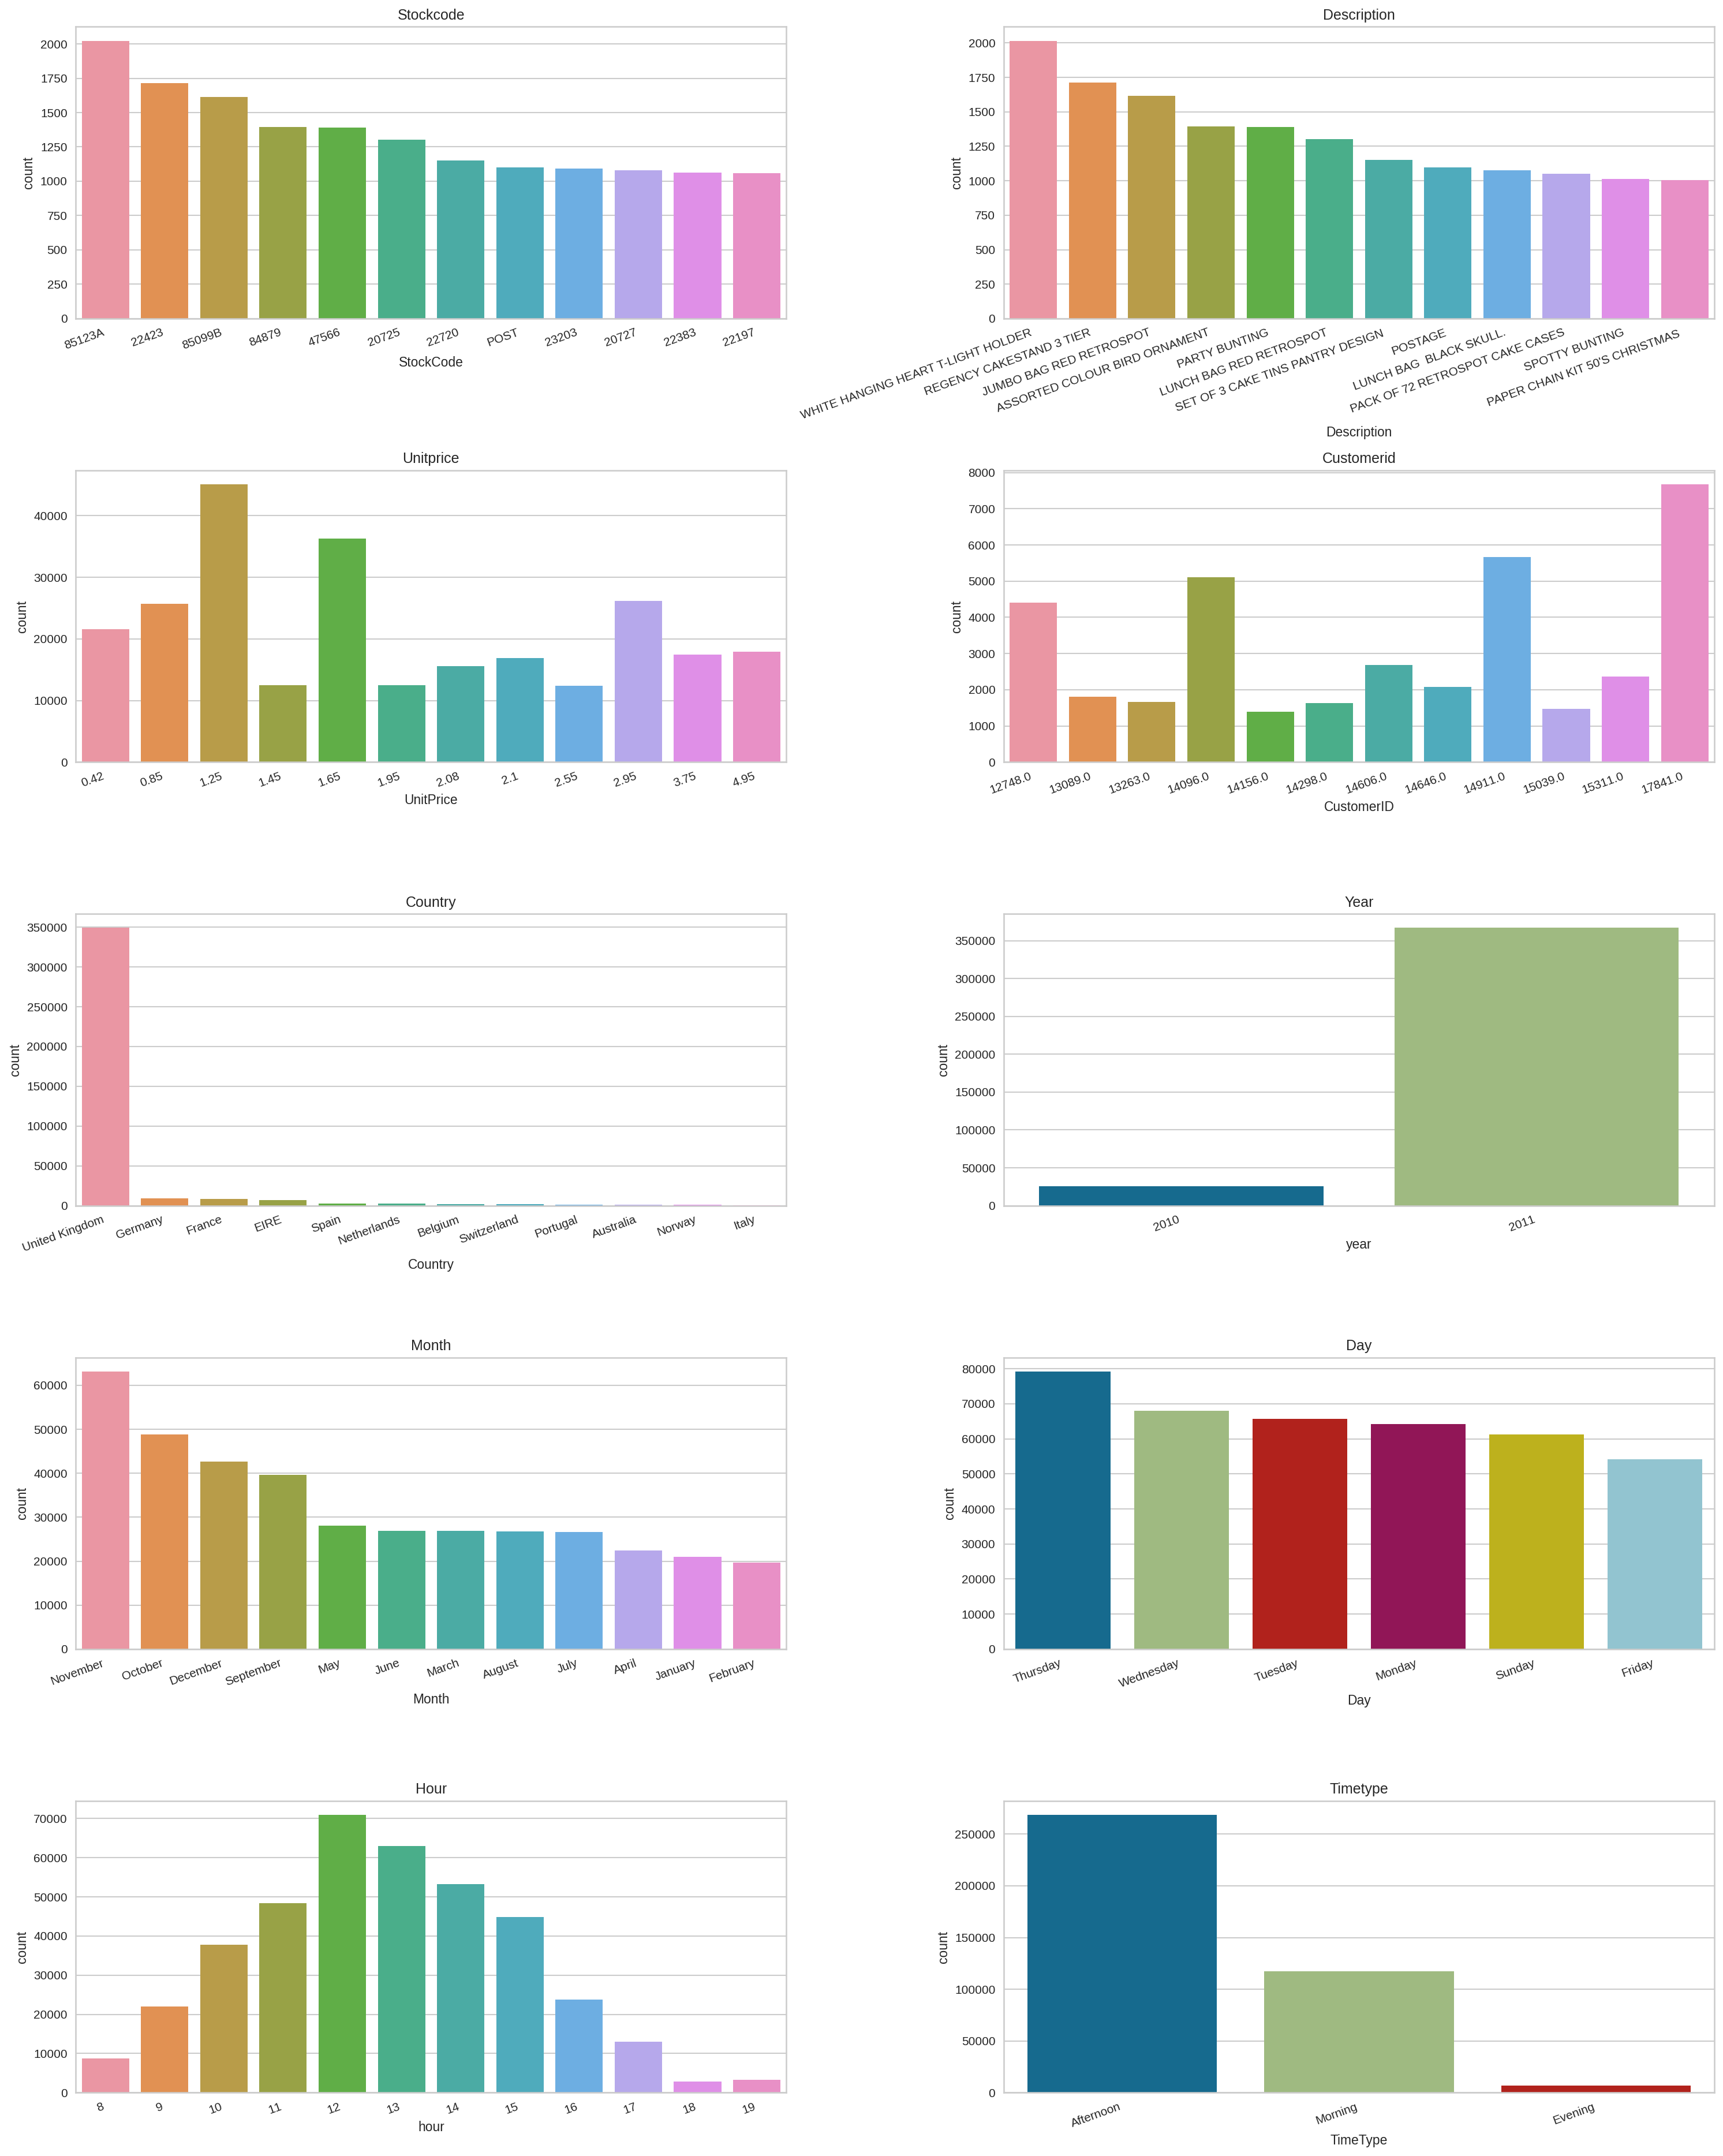

In [176]:
# Plotting top values based on frequency in each column
target = ['StockCode', 'Description','UnitPrice', 'CustomerID', 'Country',
          'year', 'Month','Day','hour','TimeType']

plt.figure(figsize=(20,25))
for n,col in enumerate(target):
  plt.subplot(5, 2, n+1)
  temp = df[col].value_counts().reset_index().head(12)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col.title())
  plt.xticks(rotation=20,ha='right')
  plt.tight_layout()

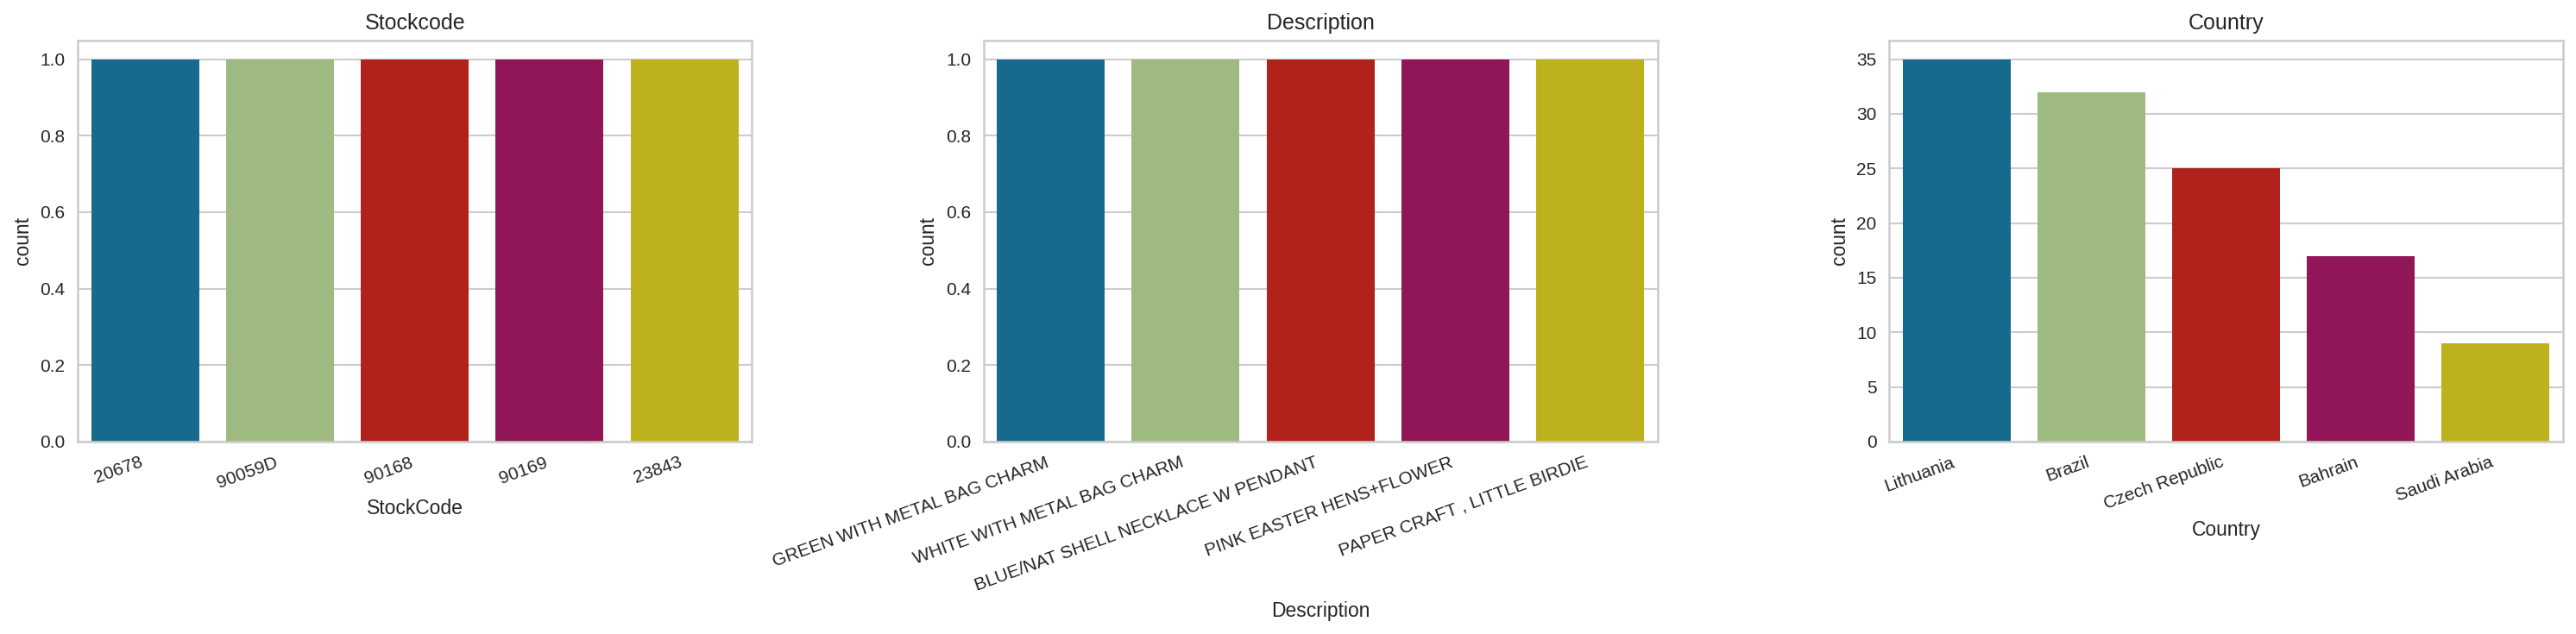

In [177]:
# Plotting Bottom values based on frequency in each column
target = ['StockCode', 'Description','Country']

for n,col in enumerate(target):
  plt.subplot(1, 3, n+1)
  temp = df[col].value_counts().reset_index().tail(5)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col.title())
  plt.xticks(rotation=20,ha='right')
  plt.tight_layout()

Observations/Hypothesis:
1. Most Customers are from United Kingdom. Considerable number of customers are also from Germany, France, EIRE and Spain. Whereas Saudi Arabia, Bahrain, Czech Republic, Brazil and Lithuania has least number of customers 
2. There are no orders placed on Saturdays. Looks like it's a non working day for the retailer.
3. Most of the customers have purchased the gifts in the month of November, October, December and September. Less number of customers have purchased the gifts in the month of April, January and February.
4. Most of the customers have purchased the items in Afternoon, moderate numbers of customers have purchased the items in Morning and the least in Evening.
5. WHITE HANGING HEART T-LIGHT HOLDER, REGENCY CAKESTAND 3 TIER, JUMBO BAG RED RETROSPOT are the most ordered products

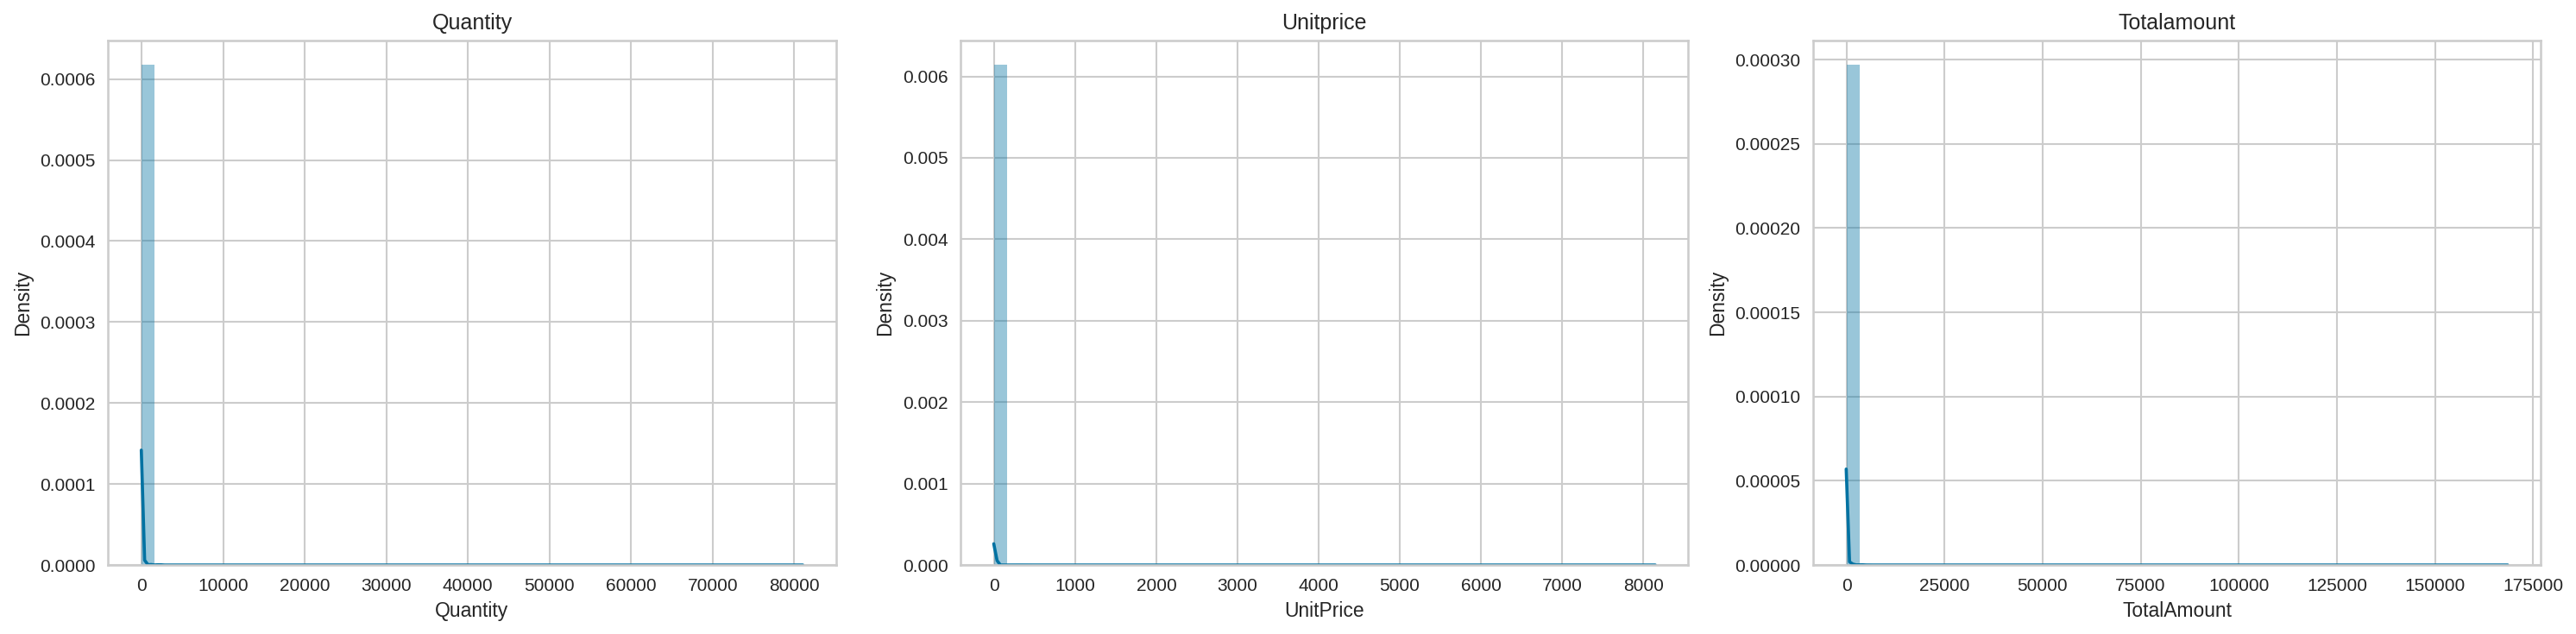

In [178]:
# Visualizing the distributions.
target = ['Quantity','UnitPrice','TotalAmount']
for n,col in enumerate(target):
  plt.subplot(1, 3, n+1)
  sns.distplot(df[col])
  plt.title(col.title())
  plt.tight_layout()

Observation:
1. It shows a positively skewed distribution because most of the values are clustered around the left side of the distribution while the right tail of the distribution is longer, which means mean>median>mode
2. For symmetric graph mean=median=mode.

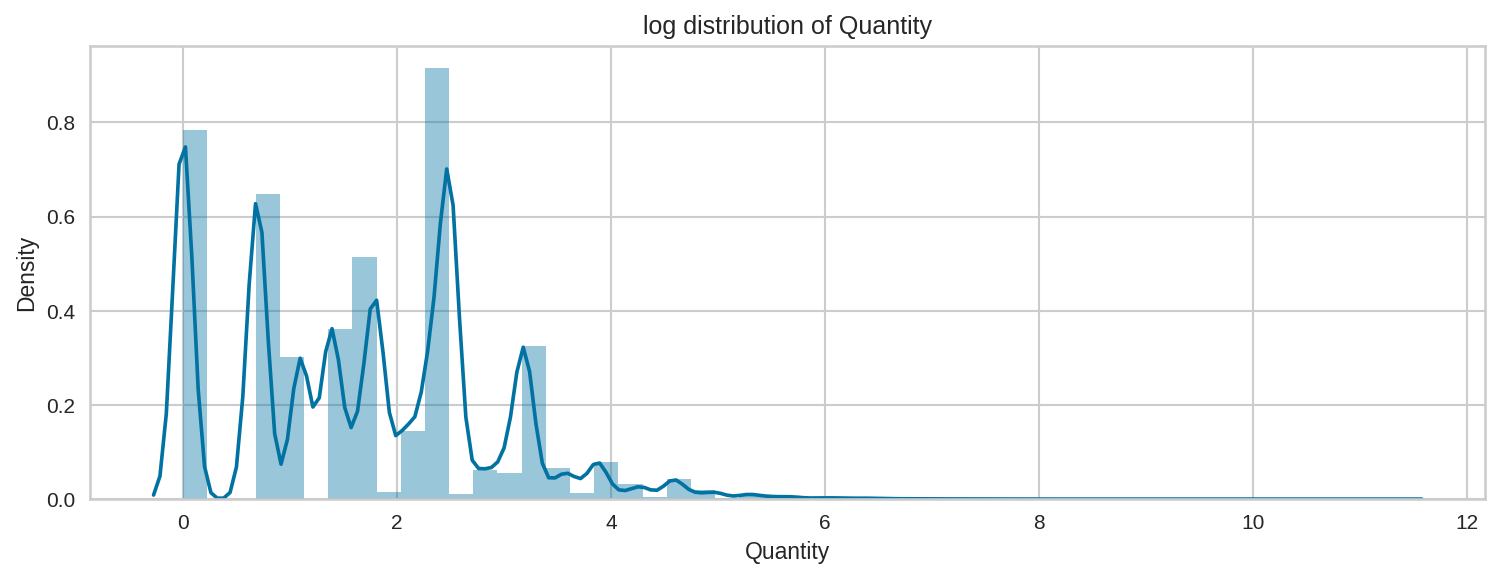

In [179]:
# Visualizing the distributions after log transformation of Quantity
plt.figure(figsize=(12,4))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']))

In [180]:
# Most orders placed are from these countries
country_invoice = df.groupby("Country").nunique()["InvoiceNo"].reset_index().sort_values("InvoiceNo",ascending=False)
country_invoice.rename(columns={'InvoiceNo': 'Invoice_Count'}, inplace=True)
country_invoice.head()

Country  Invoice_Count
35  United Kingdom          16649
14         Germany            457
13          France            389
10            EIRE            260
3          Belgium             98

* United Kingdom is making most of the purchases as compared to other countries

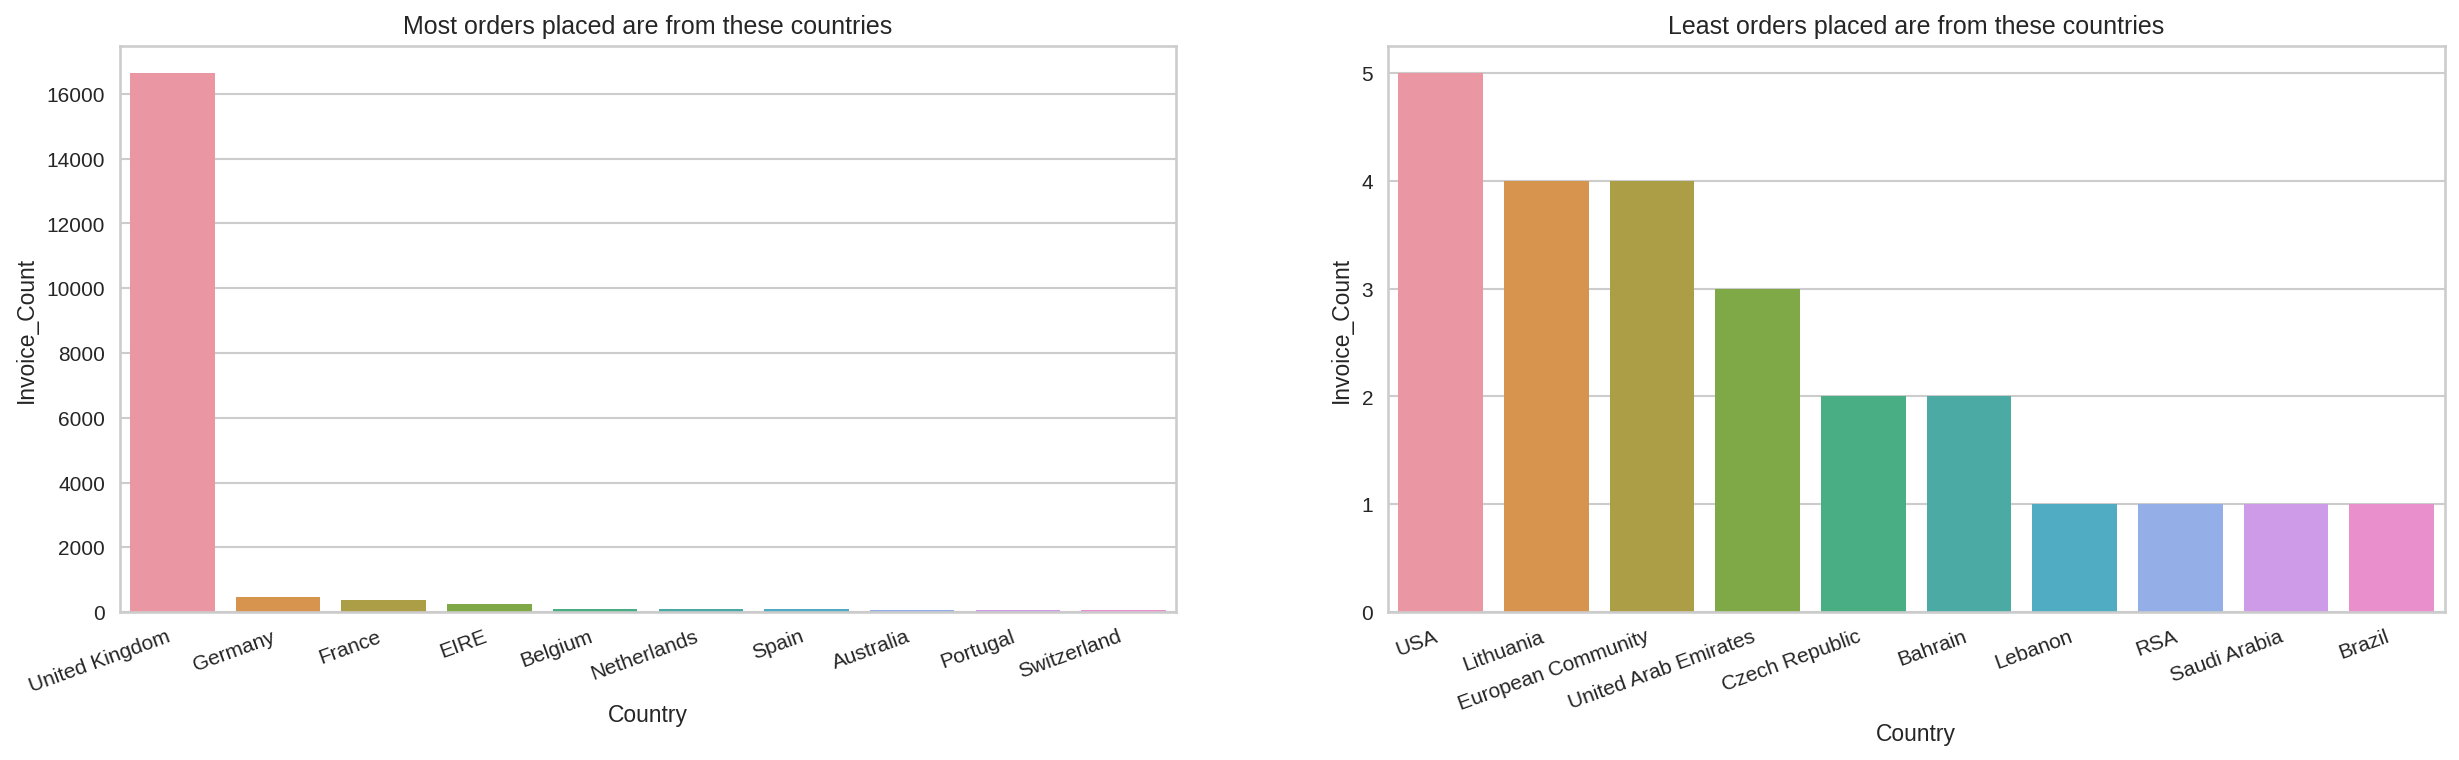

In [181]:
# Visualizing top and bottom 10 countries based on total invoices 
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Most orders placed are from these countries")
sns.barplot(data=country_invoice.head(10),x="Country",y="Invoice_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Least orders placed are from these countries")
sns.barplot(data=country_invoice.tail(10),x="Country",y="Invoice_Count")
plt.show()

In [182]:
# Most customers are from these countries
country_cust = df.groupby("Country").nunique()["CustomerID"].reset_index().sort_values("CustomerID",ascending=False)
country_cust.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
country_cust.head()

Country  Customer_Count
35  United Kingdom            3921
14         Germany              94
13          France              87
30           Spain              30
3          Belgium              25

* United Kingdom has most number of customers 



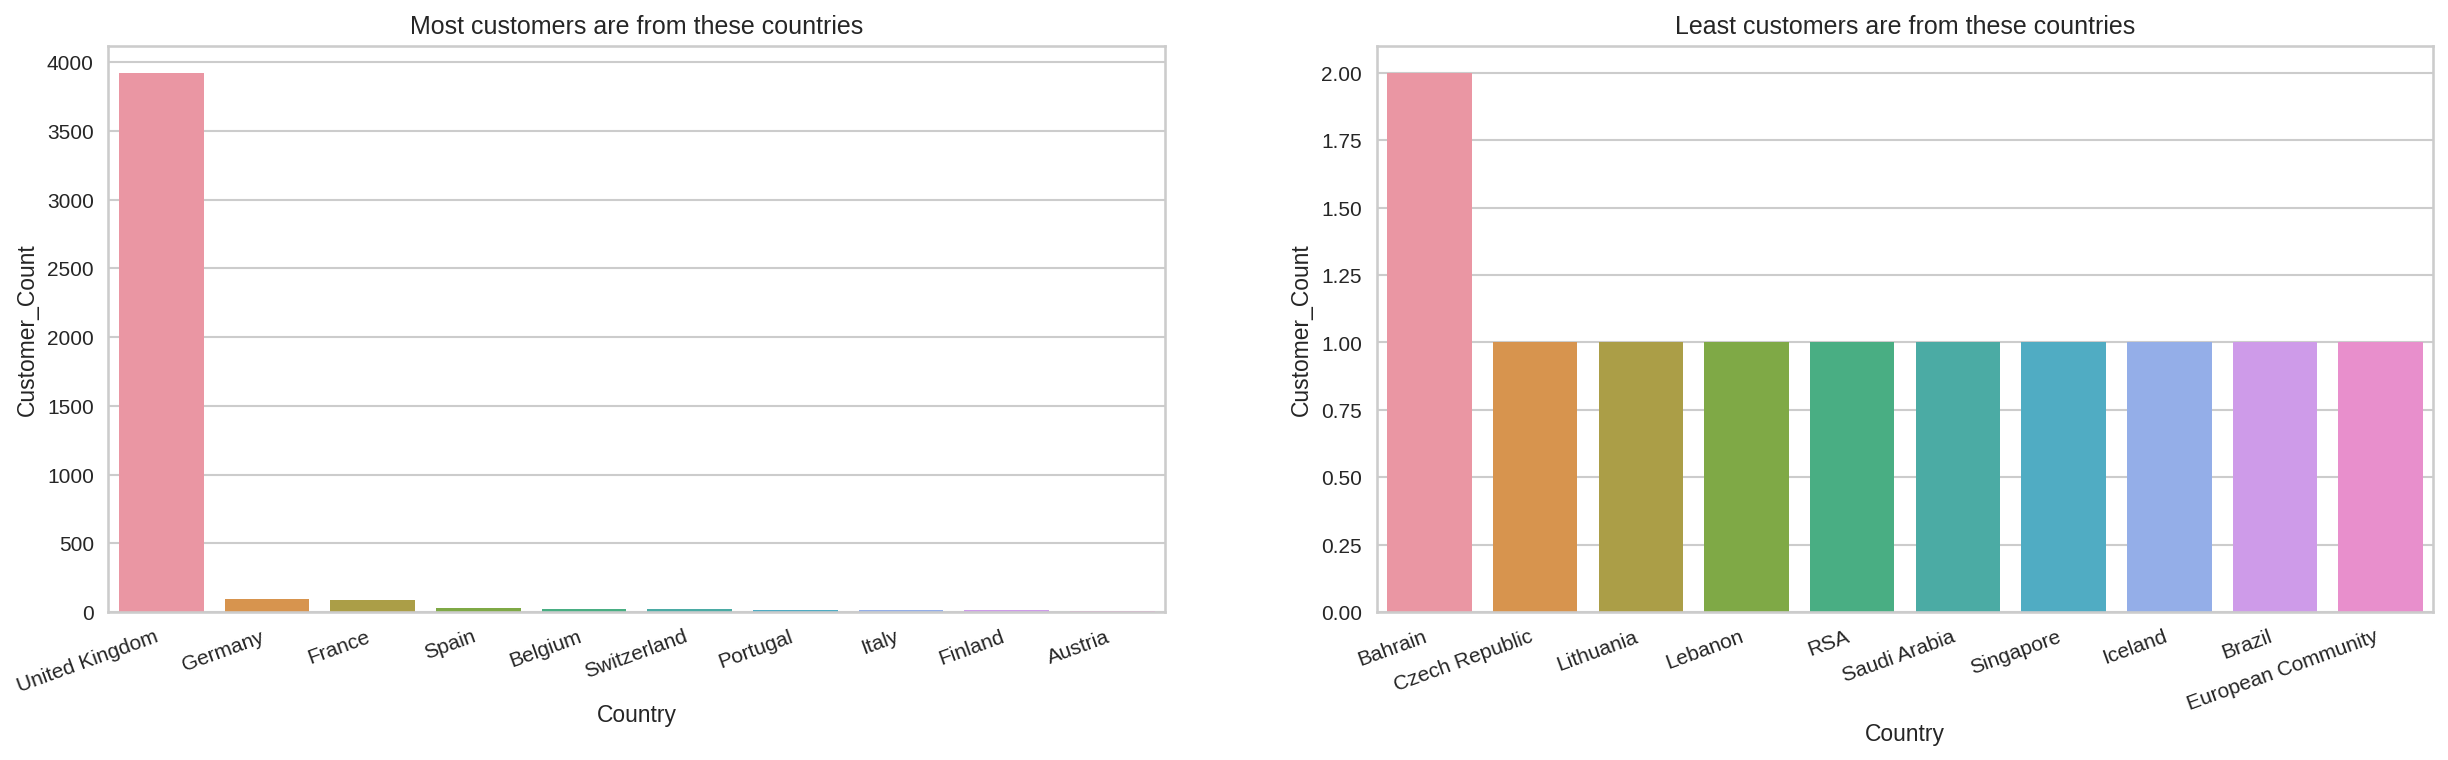

In [183]:
# Visualizing top and bottom 10 countries based on total customers 
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Most customers are from these countries")
sns.barplot(data=country_cust.head(10),x="Country",y="Customer_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Least customers are from these countries")
sns.barplot(data=country_cust.tail(10),x="Country",y="Customer_Count")
plt.show()

In [184]:
# Countrywise average item purchases
country_quantity = df.groupby("Country").mean()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
country_quantity.rename(columns={'Quantity': 'Average_Quantity'}, inplace=True)
country_quantity.head()

Country  Average_Quantity
23     Netherlands         85.034702
19           Japan         81.046729
31          Sweden         80.173333
0        Australia         71.114020
8   Czech Republic         26.840000

* Orders with mass quantity are placed by the customers from Netherlands



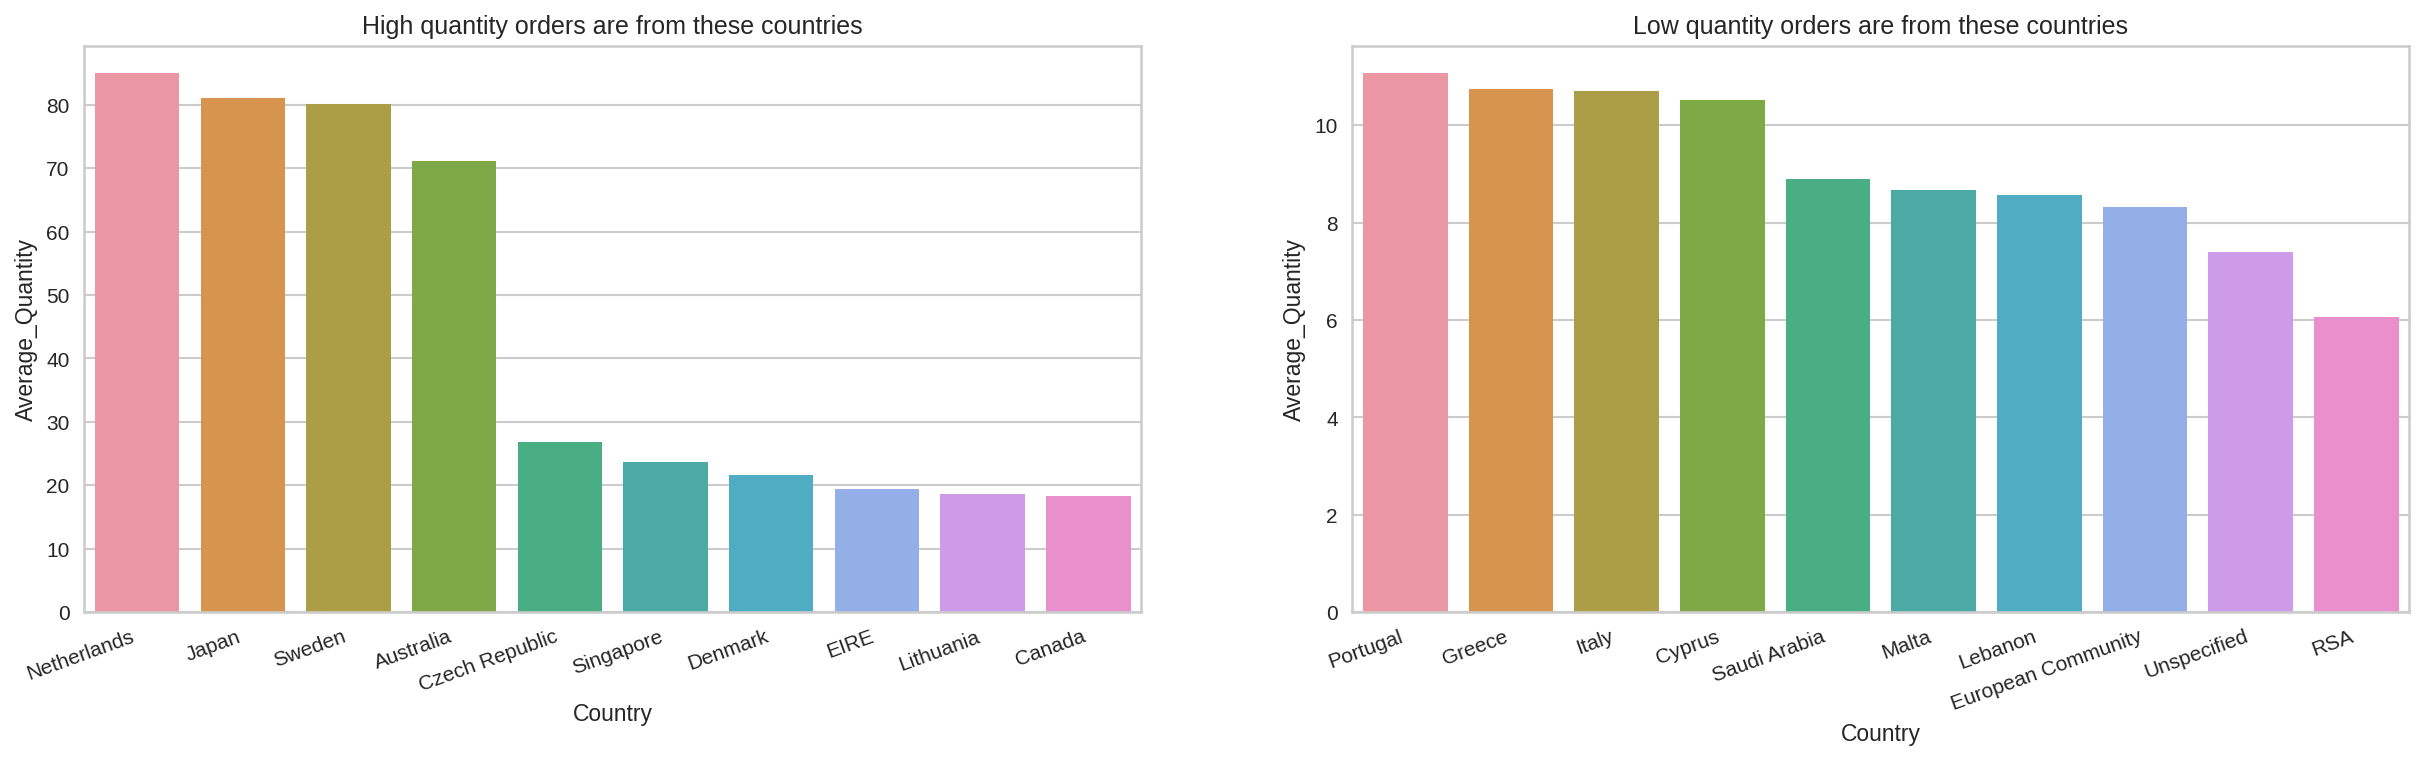

In [185]:
# Visualizing top and bottom 10 countries based on average item purchases 
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("High quantity orders are from these countries")
sns.barplot(data=country_quantity.head(10),x="Country",y="Average_Quantity")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Low quantity orders are from these countries")
sns.barplot(data=country_quantity.tail(10),x="Country",y="Average_Quantity")
plt.show()

In [186]:
# quantity wise item purchases
product_quantity = df.groupby("Description").sum()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
product_quantity.head()

Description  Quantity
2319         PAPER CRAFT , LITTLE BIRDIE     80995
1992      MEDIUM CERAMIC TOP STORAGE JAR     77916
3786   WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
1762             JUMBO BAG RED RETROSPOT     46078
3698  WHITE HANGING HEART T-LIGHT HOLDER     36706

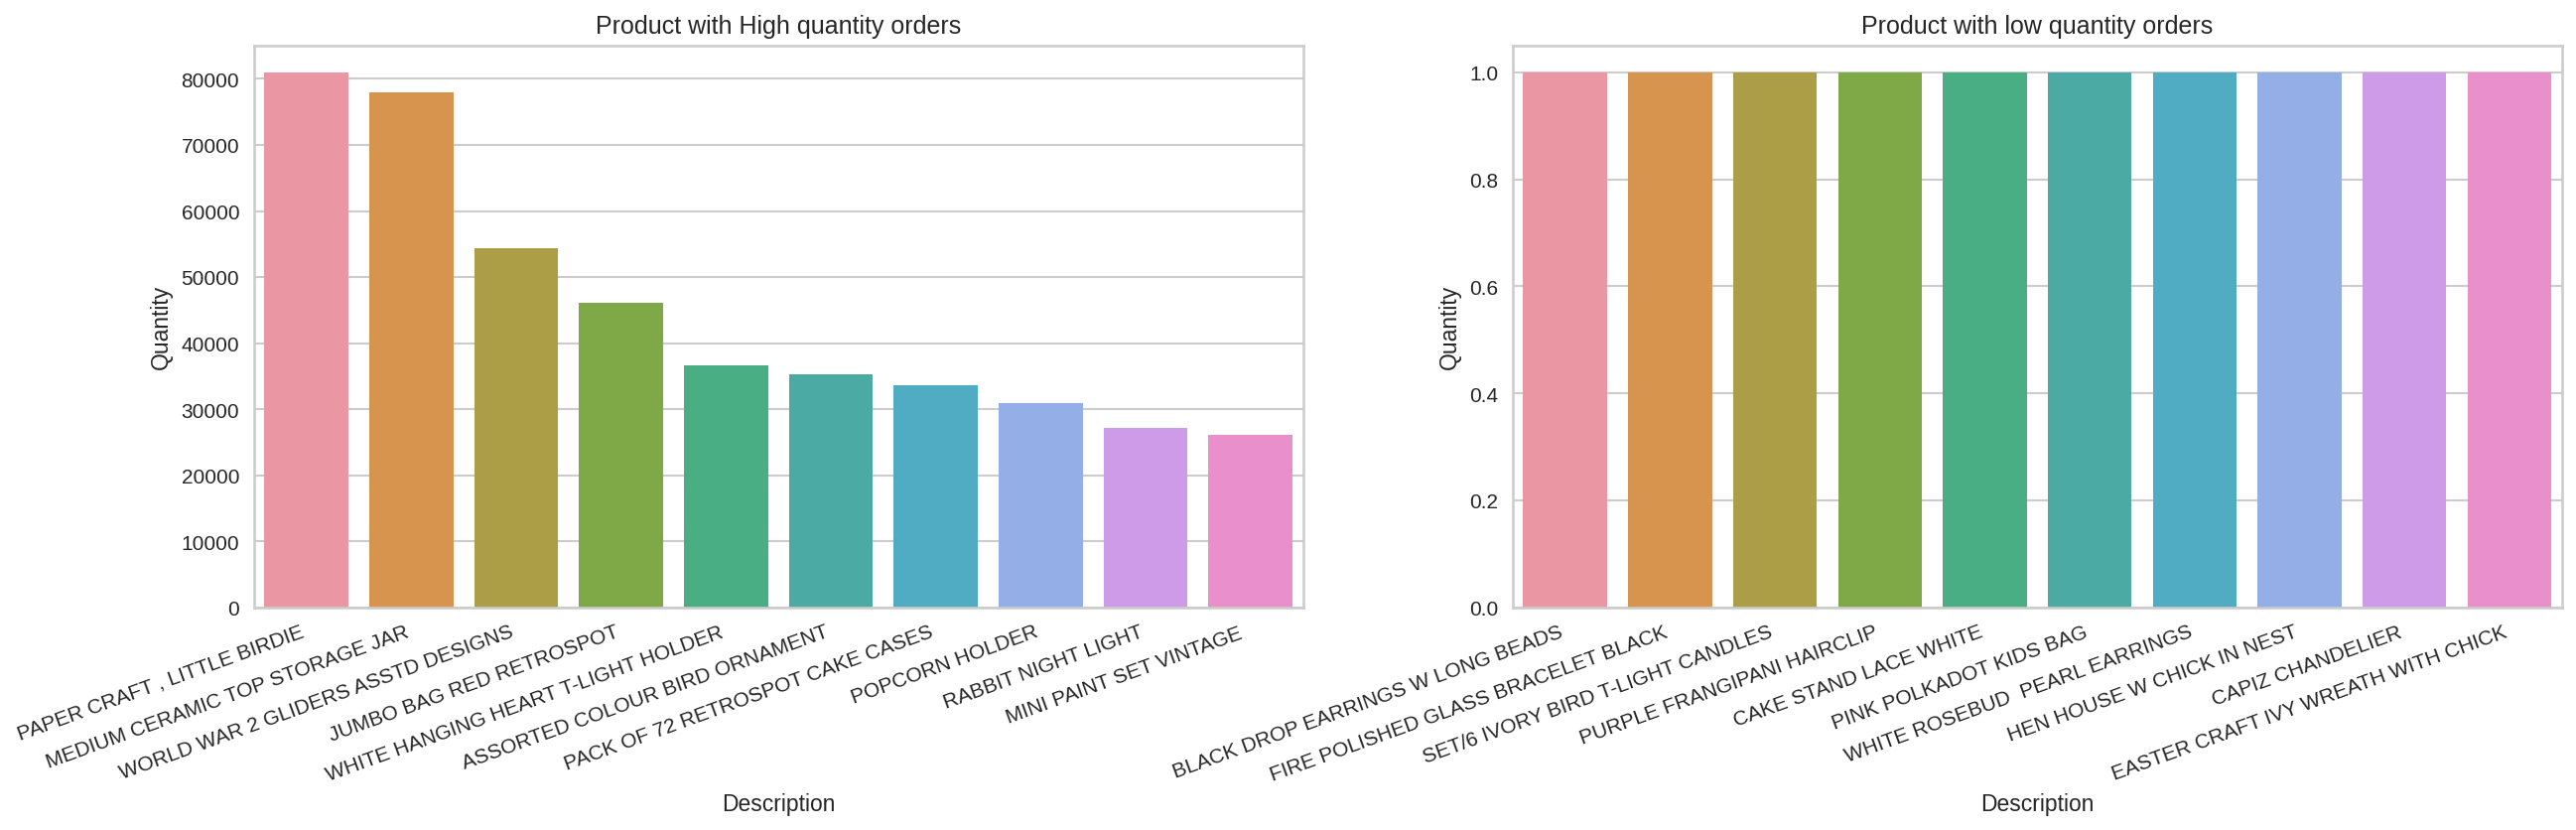

In [187]:
# Visualizing top and bottom 10 products based on purchase quantity
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product with High quantity orders")
sns.barplot(data=product_quantity.head(10),x="Description",y="Quantity")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product with low quantity orders")
sns.barplot(data=product_quantity.tail(10),x="Description",y="Quantity")
plt.show()

In [188]:
# customer wise item purchases
product_customer = df.groupby("Description").nunique()["CustomerID"].reset_index().sort_values("CustomerID",ascending=False)
product_customer.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
product_customer.head()

Description  Customer_Count
2767            REGENCY CAKESTAND 3 TIER             881
3698  WHITE HANGING HEART T-LIGHT HOLDER             856
2345                       PARTY BUNTING             708
216        ASSORTED COLOUR BIRD ORNAMENT             678
3001   SET OF 3 CAKE TINS PANTRY DESIGN              640

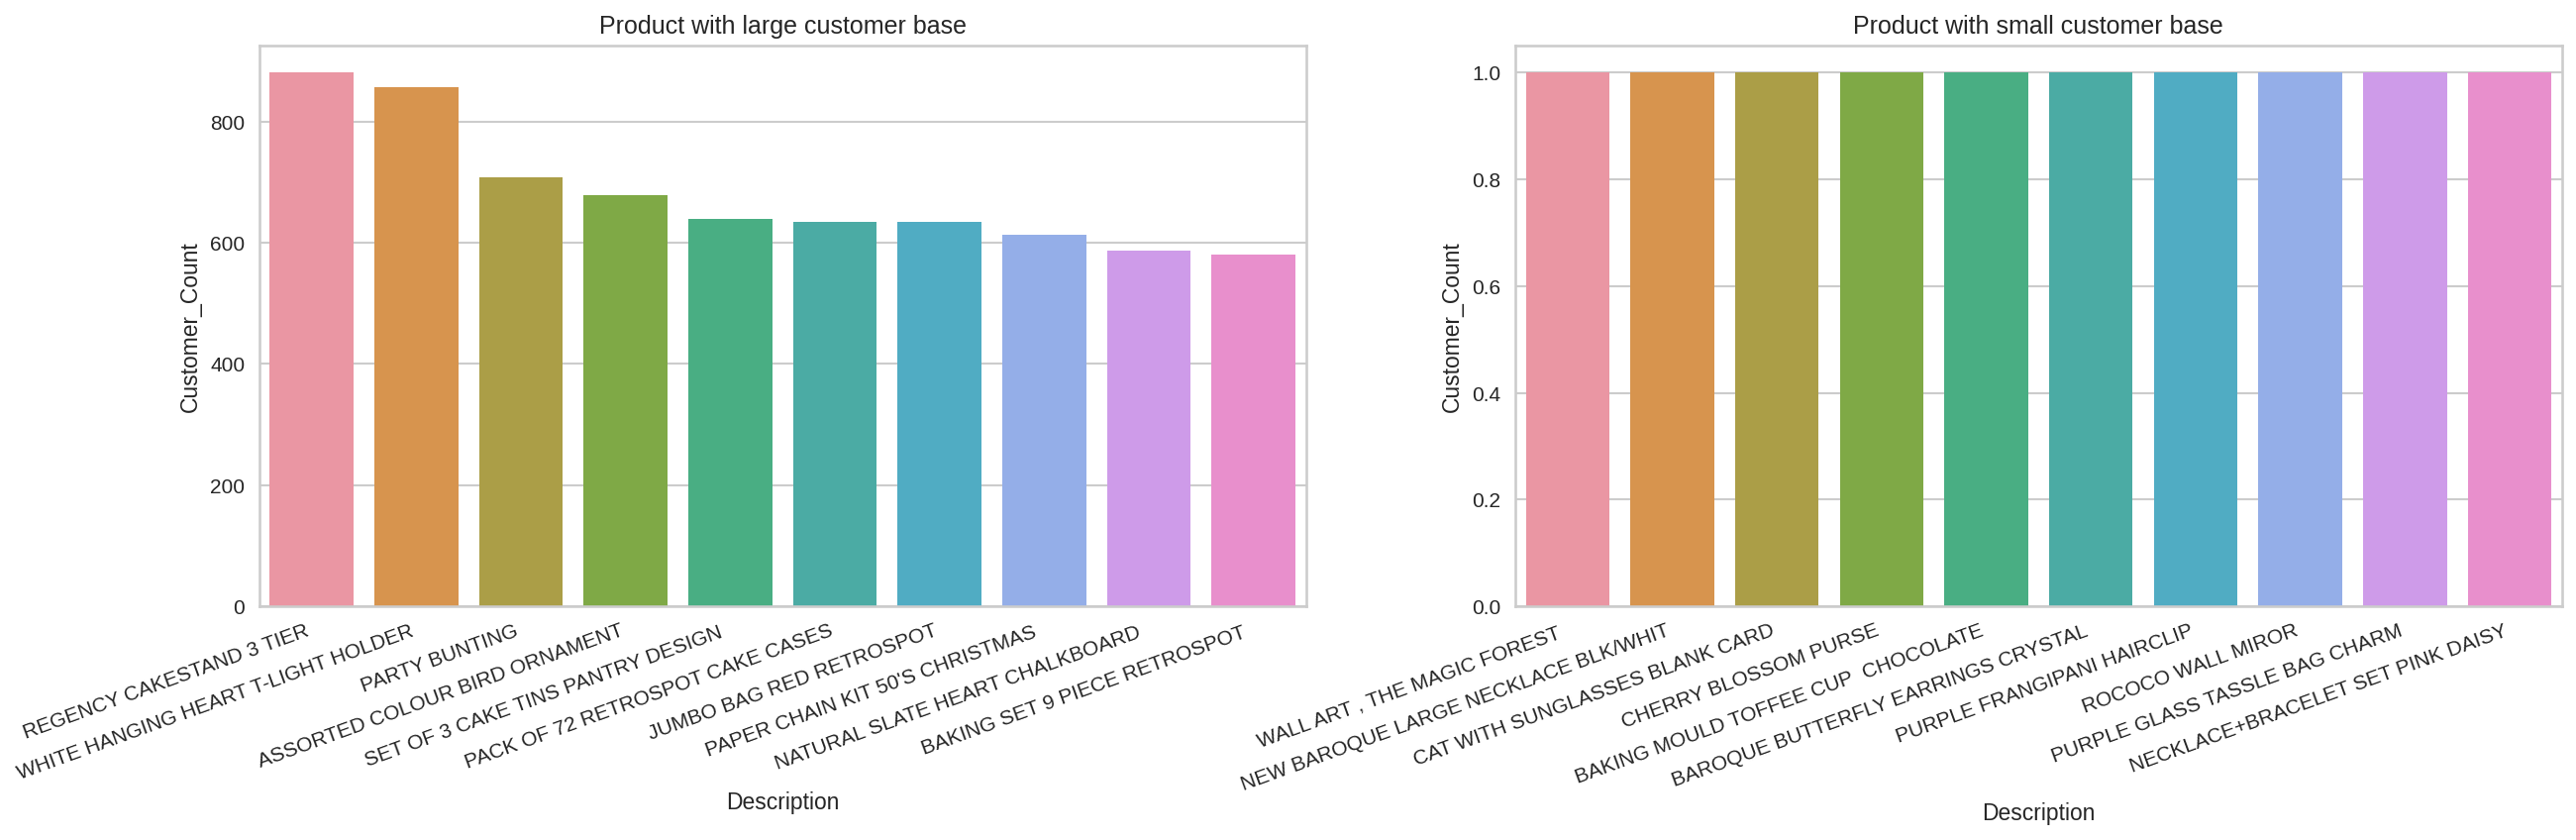

In [189]:
# Visualizing top and bottom 10 products based on customers
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product with large customer base")
sns.barplot(data=product_customer.head(10),x="Description",y="Customer_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product with small customer base")
sns.barplot(data=product_customer.tail(10),x="Description",y="Customer_Count")
plt.show()

In [190]:
# Checking the number of cancellations by each customer. 
customer_cancellations = cancellations.groupby('CustomerID').count()['InvoiceNo'].reset_index().sort_values("InvoiceNo",ascending=False)
customer_cancellations.rename(columns={'InvoiceNo': 'Cancellations'}, inplace=True)
customer_cancellations.head()

CustomerID  Cancellations
736      14911.0            226
1485     17841.0            136
1397     17511.0            113
848      15311.0            112
89       12607.0            101

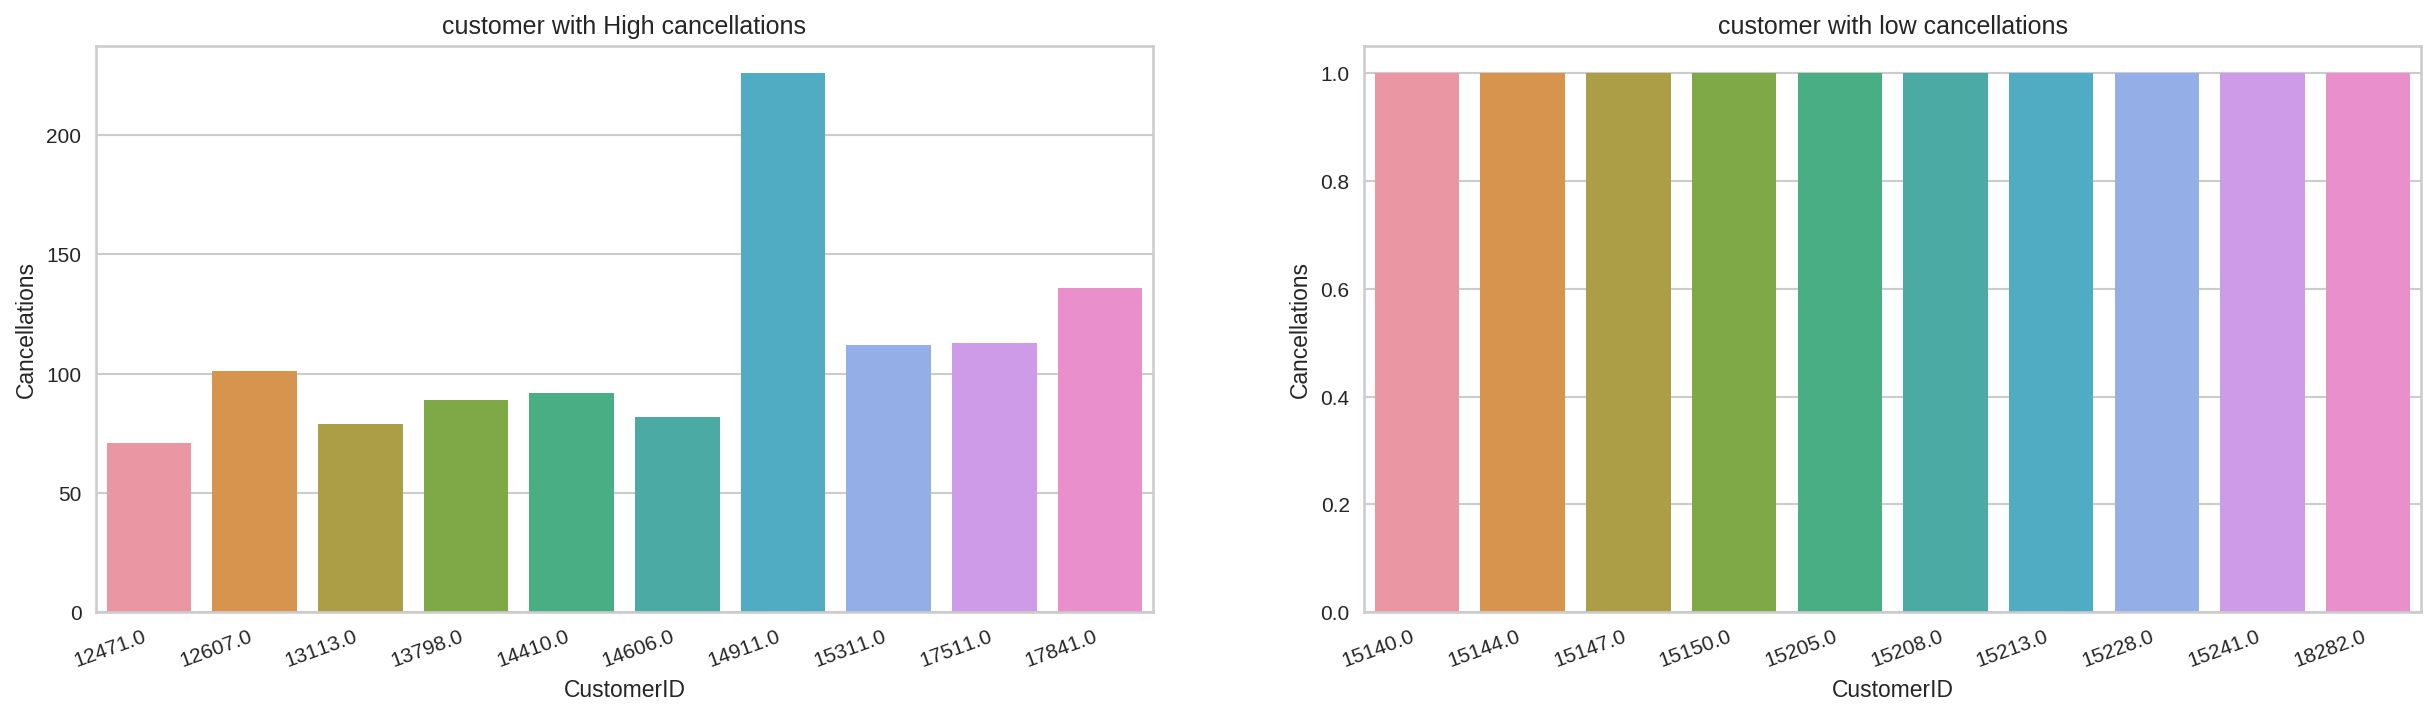

In [191]:
# Visualizing top and bottom 10 customers based on cancellations 
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("customer with High cancellations")
sns.barplot(data=customer_cancellations.head(10),x="CustomerID",y="Cancellations")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("customer with low cancellations")
sns.barplot(data=customer_cancellations.tail(10),x="CustomerID",y="Cancellations")
plt.show()

In [192]:
# Checking the number of cancellations countrywise. 
country_cancellations = cancellations.groupby('Country').count()['InvoiceNo'].reset_index().sort_values("InvoiceNo",ascending=False)
country_cancellations.rename(columns={'InvoiceNo': 'Cancellations'}, inplace=True)
country_cancellations.head()

Country  Cancellations
27  United Kingdom           7501
11         Germany            453
7             EIRE            247
10          France            148
26             USA            112

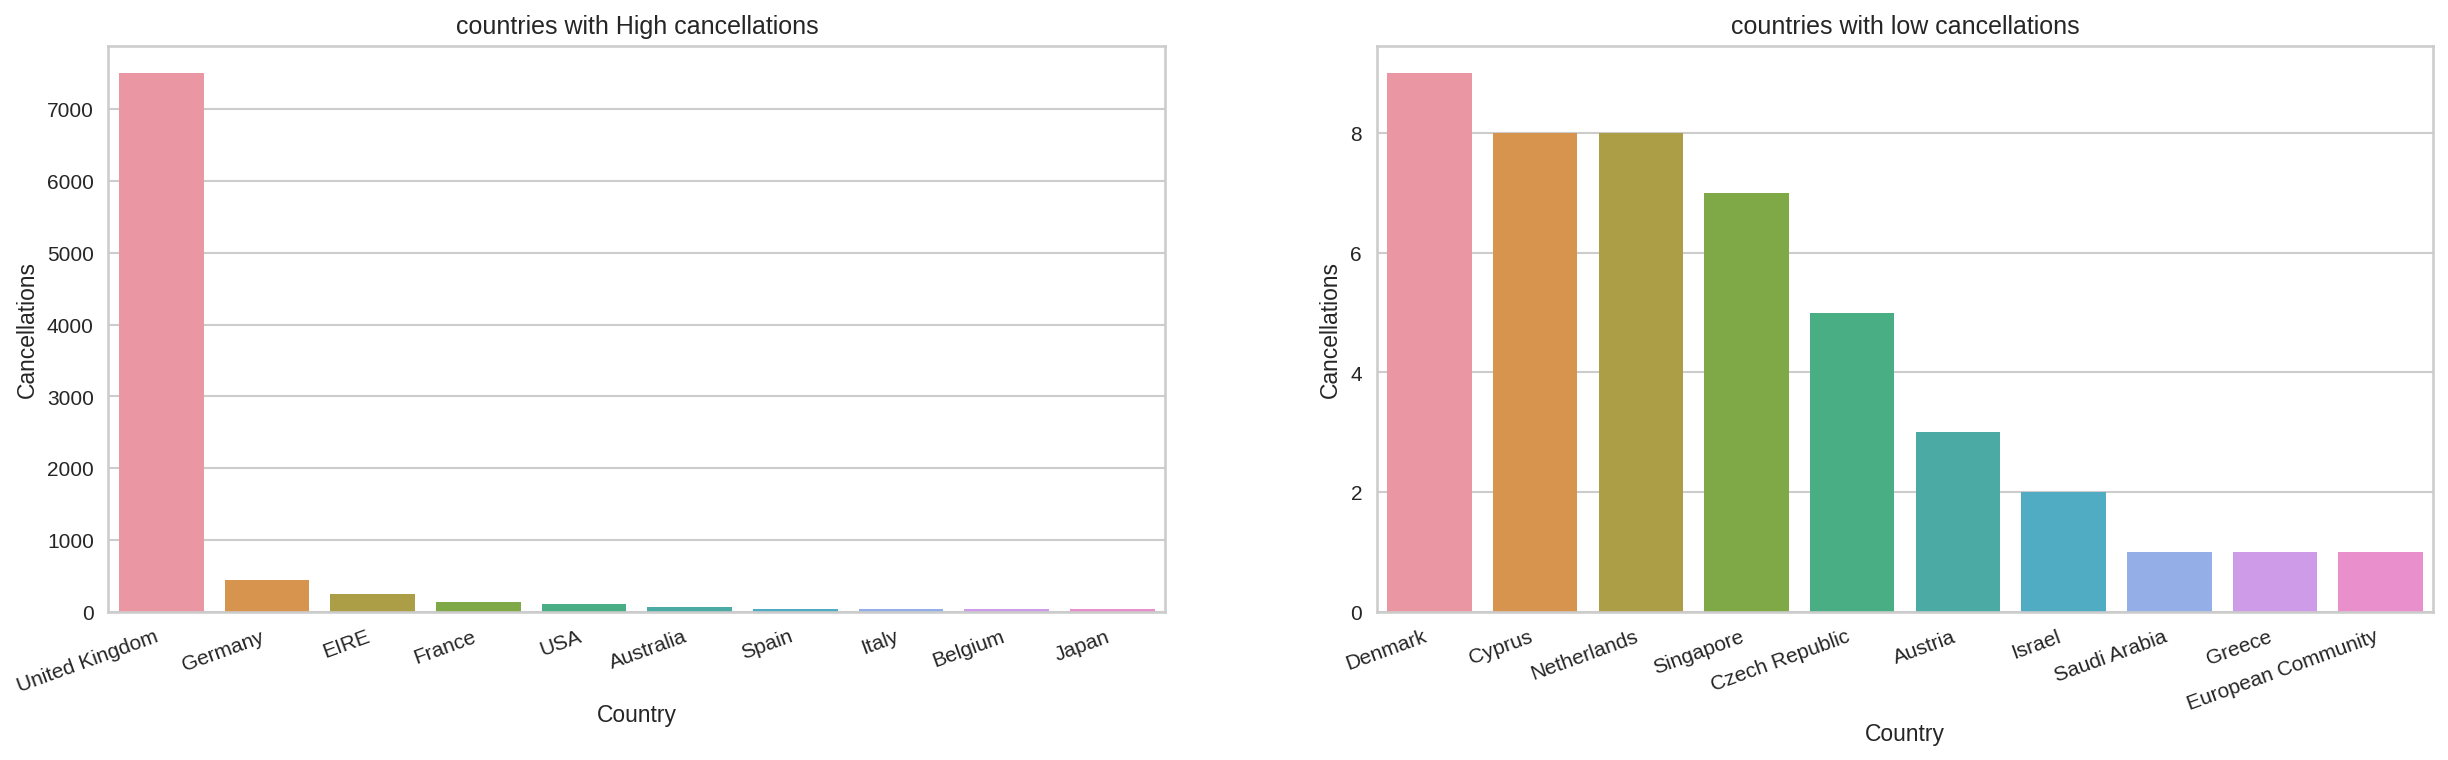

In [193]:
# Visualizing top and bottom 10 countries based on cancellations 
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("countries with High cancellations")
sns.barplot(data=country_cancellations.head(10),x="Country",y="Cancellations")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("countries with low cancellations")
sns.barplot(data=country_cancellations.tail(10),x="Country",y="Cancellations")
plt.show()

## **RFM Modelling**

1. Since Most of the Customers are wholesalers we cannot group customers based on the demographic group like age, gender, income and behavioral and psycho-graphic group Because Our Customers purchase bunch of goods from us and sell it to individual customers.
2. We only need to deal issues and make clusters related to B2B Business to Business instead of B2C i.e. Direct from Business to Customers
WHY BECAUSE PEOPLE WHO PURCHASE PRODUCTS FROM US DO NOT UTILIZE IT
They sell it to individual customers(B2C) or sell all products to another stores (B2B)
3. Due to all these reasons we need to cluster customers according to there activities i.e
  1. R- Recency
  2. F- Frequency
  3. M- Monetary

In [194]:
# Adding 1 day to the Last Invoice date to set as Latest date for reference
LatestDate = df["InvoiceDate"].max() + pd.DateOffset(days=1)

# Creating a new dataframe to calculate Recency, Frequency and Monetary scores for each customer
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (LatestDate - x.max()).days,
                                    'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

# Renaming the columns
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency',
                    'TotalAmount': 'Monetary'}, inplace=True)

# Checking top 5 rows
rfm.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       19         73   1757.55
4     12350.0      310         17    334.40

Interpretation:
1. Recency: How recent a customer made a purchase.
2. Frequency: How often a customer makes a purchase.
3. Monetary: How much money a customer spends.

In [195]:
# Calculating R, F and M scores by splitting Recency, Frequency	and Monetary based on quantiles
rfm['R'] = pd.qcut(rfm['Recency'], q=4, labels=[4,3,2,1]).astype(int)
rfm['F'] = pd.qcut(rfm['Frequency'], q=4, labels=[1,2,3,4]).astype(int)
rfm['M'] = pd.qcut(rfm['Monetary'], q=4, labels=[1,2,3,4]).astype(int)

# Finding the RFM Group for each customer by combining the factors R,Fand M
rfm['RFM'] = 100*rfm['R'] + 10*rfm['F'] + rfm['M']

# Finding the RFM Score for each customer by adding the factors R,Fand M
rfm['RFM_Score'] = rfm['R'] + rfm['F'] + rfm['M']

Interpretation:
1. If the RFM of any customer is 444. His Recency is good, frequency is more and Monetary is more. So, he is the best customer.
2. If the RFM of any customer is 111. His Recency is low, frequency is low and Monetary is low. So, he is the churning customer.
3. If the RFM of any customer is 144. He purchased a long time ago but buys frequently and spends more. And so on.
4. Like this we can come up with number of segments for all combinations of R,F and M base on our usecase. Higher the RFM score, more valuable the customer is.

In [196]:
# Handling the zeroes in the dataframe to avoid error in transformations
rfm.replace(0.0,1,inplace=True)

# Applying Log transformation on columns for smoothening the distribution
rfm['Recency_Log']   = rfm['Recency'].apply(np.log)
rfm['Frequency_Log'] = rfm['Frequency'].apply(np.log)
rfm['Monetary_Log']  = rfm['Monetary'].apply(np.log)
rfm.head()

Recency  Frequency  Monetary  R  F  M  RFM  RFM_Score  \
CustomerID                                                          
12346.0         326          1  77183.60  1  1  4  114          6   
12347.0           2        182   4310.00  4  4  4  444         12   
12348.0          75         31   1797.24  2  2  4  224          8   
12349.0          19         73   1757.55  3  3  4  334         10   
12350.0         310         17    334.40  1  1  2  112          4   

            Recency_Log  Frequency_Log  Monetary_Log  
CustomerID                                            
12346.0        5.786897       0.000000     11.253942  
12347.0        0.693147       5.204007      8.368693  
12348.0        4.317488       3.433987      7.494007  
12349.0        2.944439       4.290459      7.471676  
12350.0        5.736572       2.833213      5.812338

In [197]:
# Checking Descriptive Stats
rfm.describe()

Recency    Frequency       Monetary            R            F  \
count  4339.000000  4339.000000    4339.000000  4339.000000  4339.000000   
mean     92.518322    90.512100    2048.216154     2.514174     2.487670   
std     100.009747   225.515328    8984.248299     1.126392     1.122724   
min       1.000000     1.000000       1.000000     1.000000     1.000000   
25%      18.000000    17.000000     306.455000     2.000000     1.000000   
50%      51.000000    41.000000     668.560000     3.000000     2.000000   
75%     142.000000    98.000000    1660.315000     4.000000     3.000000   
max     374.000000  7676.000000  280206.020000     4.000000     4.000000   

                 M          RFM    RFM_Score  Recency_Log  Frequency_Log  \
count  4339.000000  4339.000000  4339.000000  4339.000000    4339.000000   
mean      2.499885   278.793962     7.501729     3.767274       3.670868   
std       1.118266   118.825268     2.816451     1.432382       1.321685   
min       1.000000   111.000000     3.000000     0.000000       0.000000   
25%       1.500000   211.000000     5.000000     2.890372       2.833213   
50%       2.000000   311.000000     7.000000     3.931826       3.713572   
75%       3.500000   411.000000    10.000000     4.955827       4.584967   
max       4.000000   444.000000    12.000000     5.924256       8.945854   

       Monetary_Log  
count   4339.000000  
mean       6.584187  
std        1.265573  
min        0.000000  
25%        5.725071  
50%        6.505126  
75%        7.414763  
max       12.543280

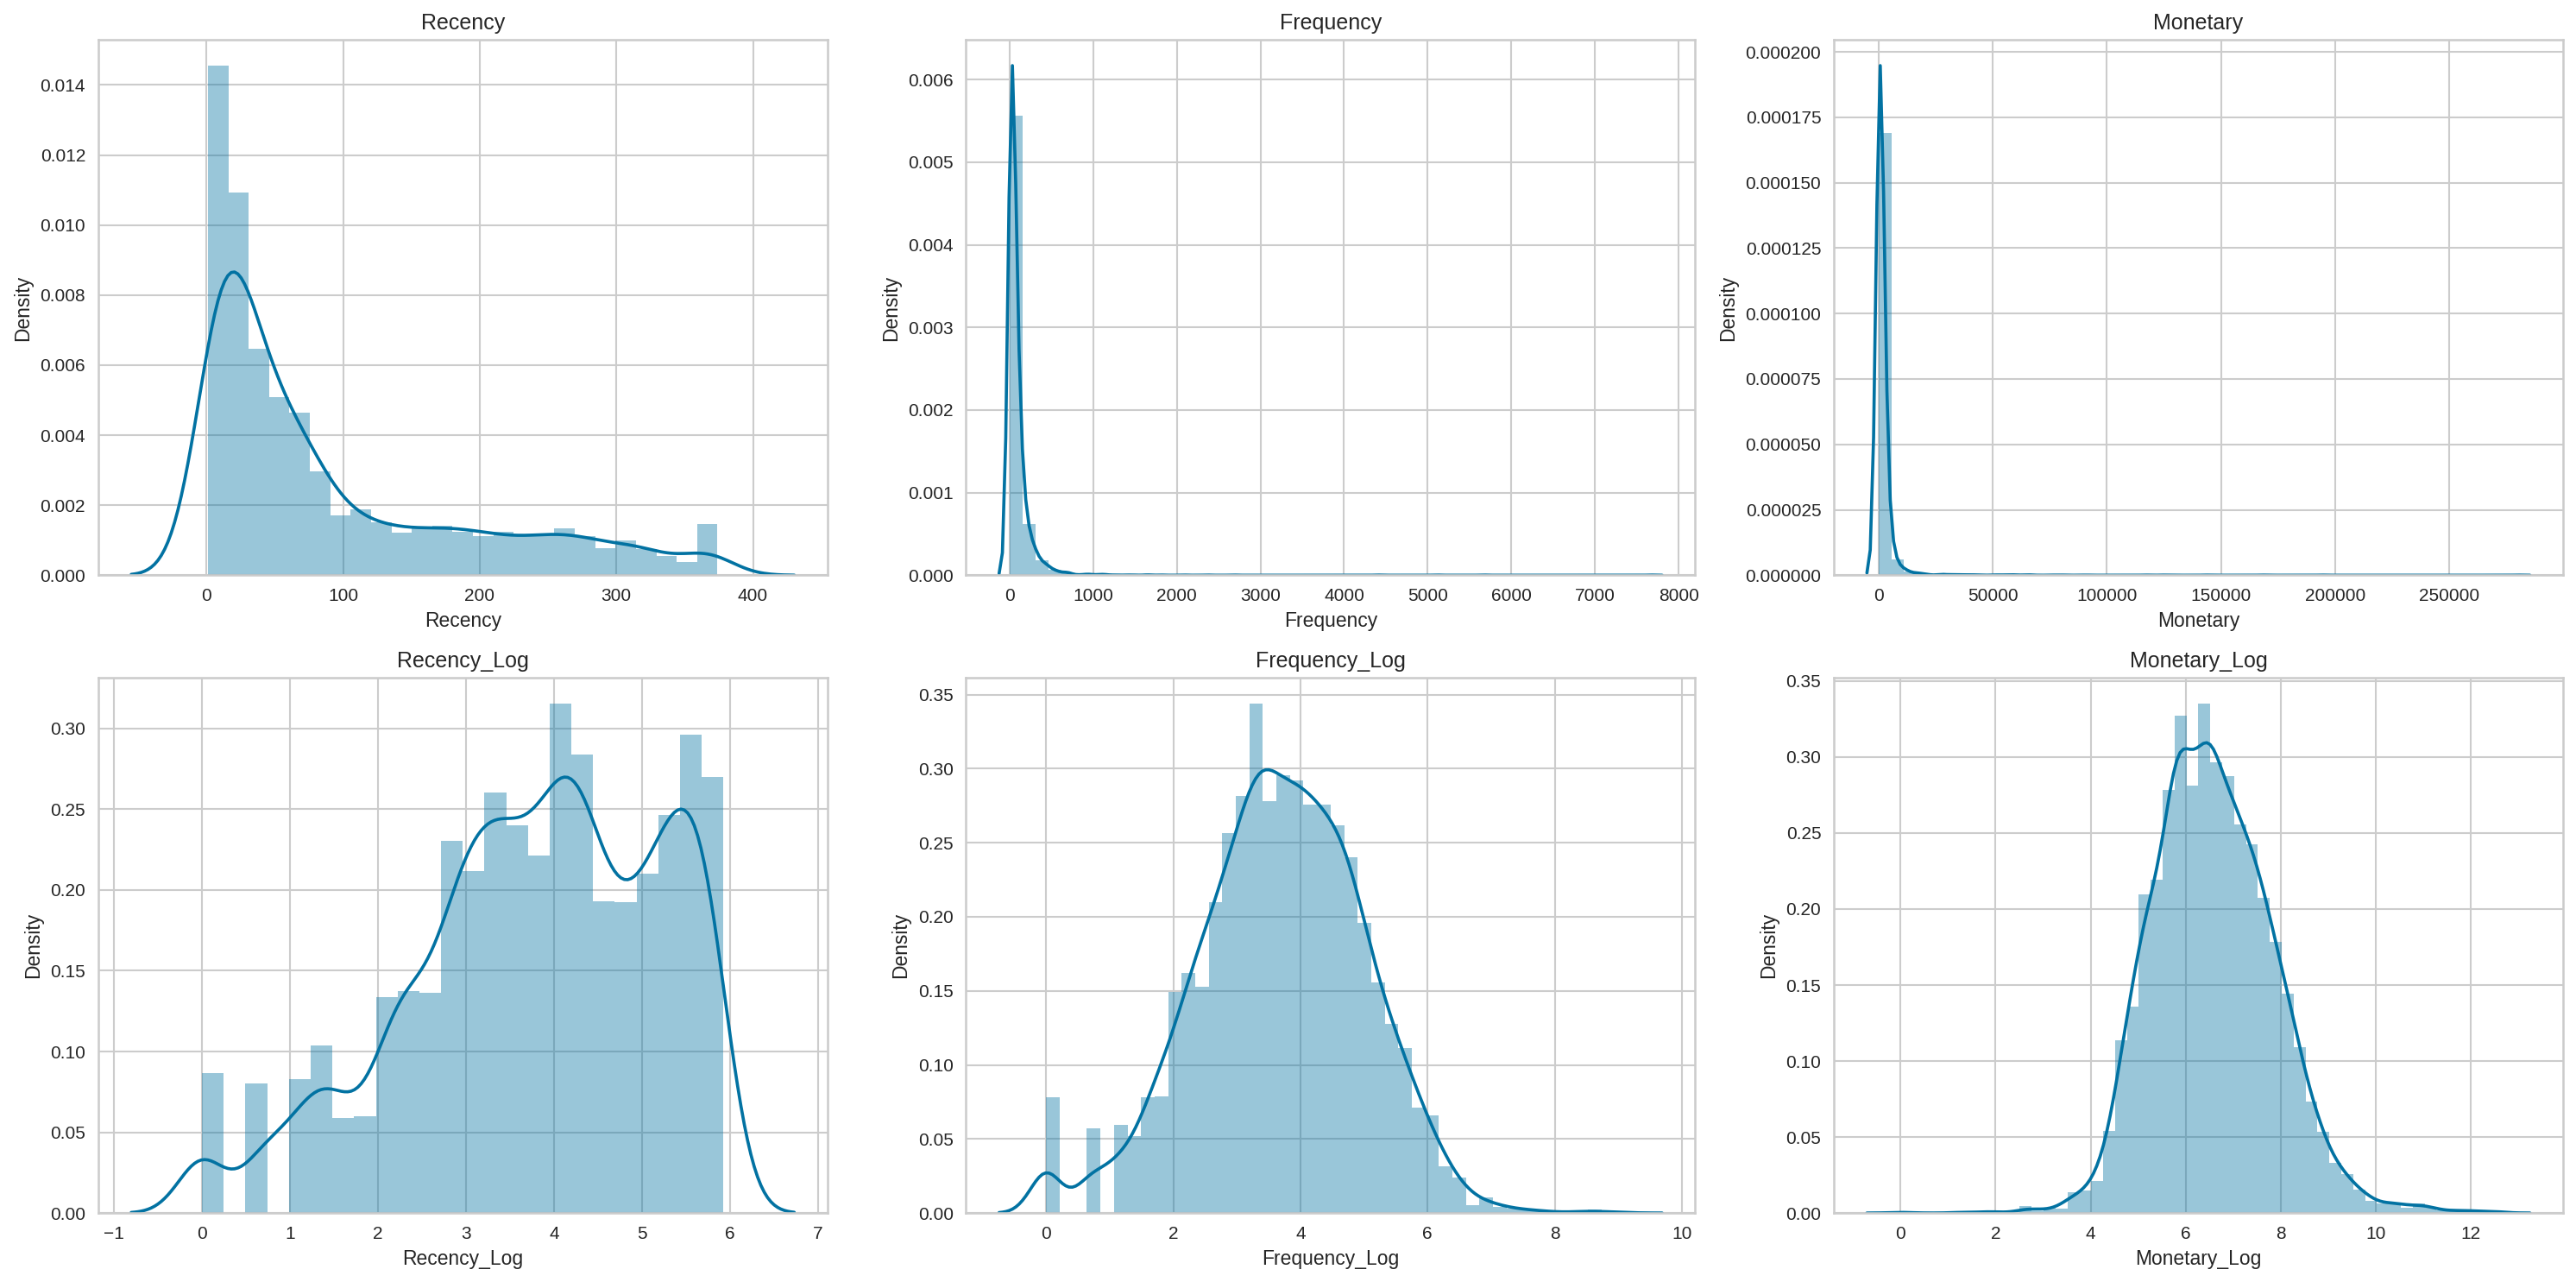

In [198]:
# Visualizing the distributions before and after log transformation.
target = ['Recency', 'Frequency',	'Monetary', 'Recency_Log', 'Frequency_Log', 'Monetary_Log']
plt.figure(figsize=(20,10))
for n,col in enumerate(target):
  plt.subplot(2, 3, n+1)
  sns.distplot(rfm[col])
  plt.title(col.title())
  plt.tight_layout()

Observations:
1. Earlier the distributions of Recency, Frequency and Monetary columns were positively skewed but after applying log transformation, the distributions appear to be symmetrical and normally distributed.
2. It will be more suitable to use the transformed features for better visualisation of clusters.

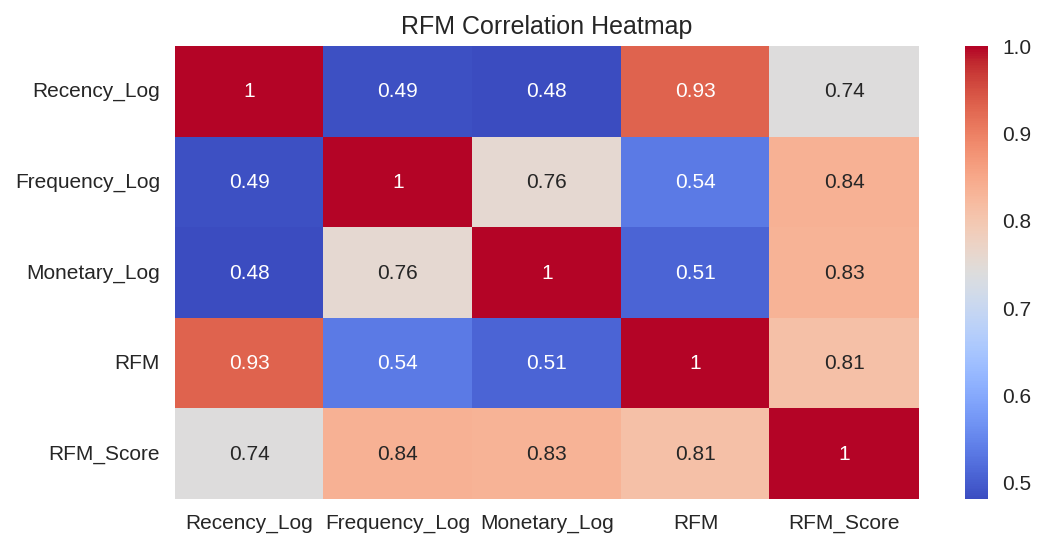

In [199]:
# Visualizing the correlations among features.
target = ['Recency_Log','Frequency_Log','Monetary_Log','RFM','RFM_Score']
plt.figure(figsize = (8, 4))
sns.heatmap(abs(rfm[target].corr()), annot=True, cmap='coolwarm')
plt.title('RFM Correlation Heatmap')
plt.show()

#**Clustering**

##**Prerequisites**

In [200]:
# Defining X Variables
X = rfm[['Recency_Log','Frequency_Log','Monetary_Log']]
X = StandardScaler().fit_transform(X)

In [201]:
# Defining a function for plotting clusters for Visualization
def plotc(y, title):
  '''Takes predicted y labels as input and plots 3d visualization of clusters and 
  Displays the mean median and count of Recency, Frequency and Monetary for each group'''
  plt.figure(figsize = (18, 8))
  ax = plt.axes(projection ="3d")
  ax.set_xlabel('Recency', fontweight ='bold')
  ax.set_ylabel('Frequency', fontweight ='bold')
  ax.set_zlabel('Monetary', fontweight ='bold')
  ax.set_title(title, fontweight ='bold')
  ax = ax.scatter(X[:, 0], X[:, 1], X[:, 2] ,c=y, cmap='viridis')
  plt.legend(*ax.legend_elements(), loc=1)
  plt.show()

  # Displaying the mean median and count of Recency, Frequency and Monetary for each group
  rfm["Segment"] = y
  display(rfm[["Recency","Frequency","Monetary","Segment"]].groupby("Segment").agg(['mean','median','count']).style.bar())

##**Binning RFM_Score**

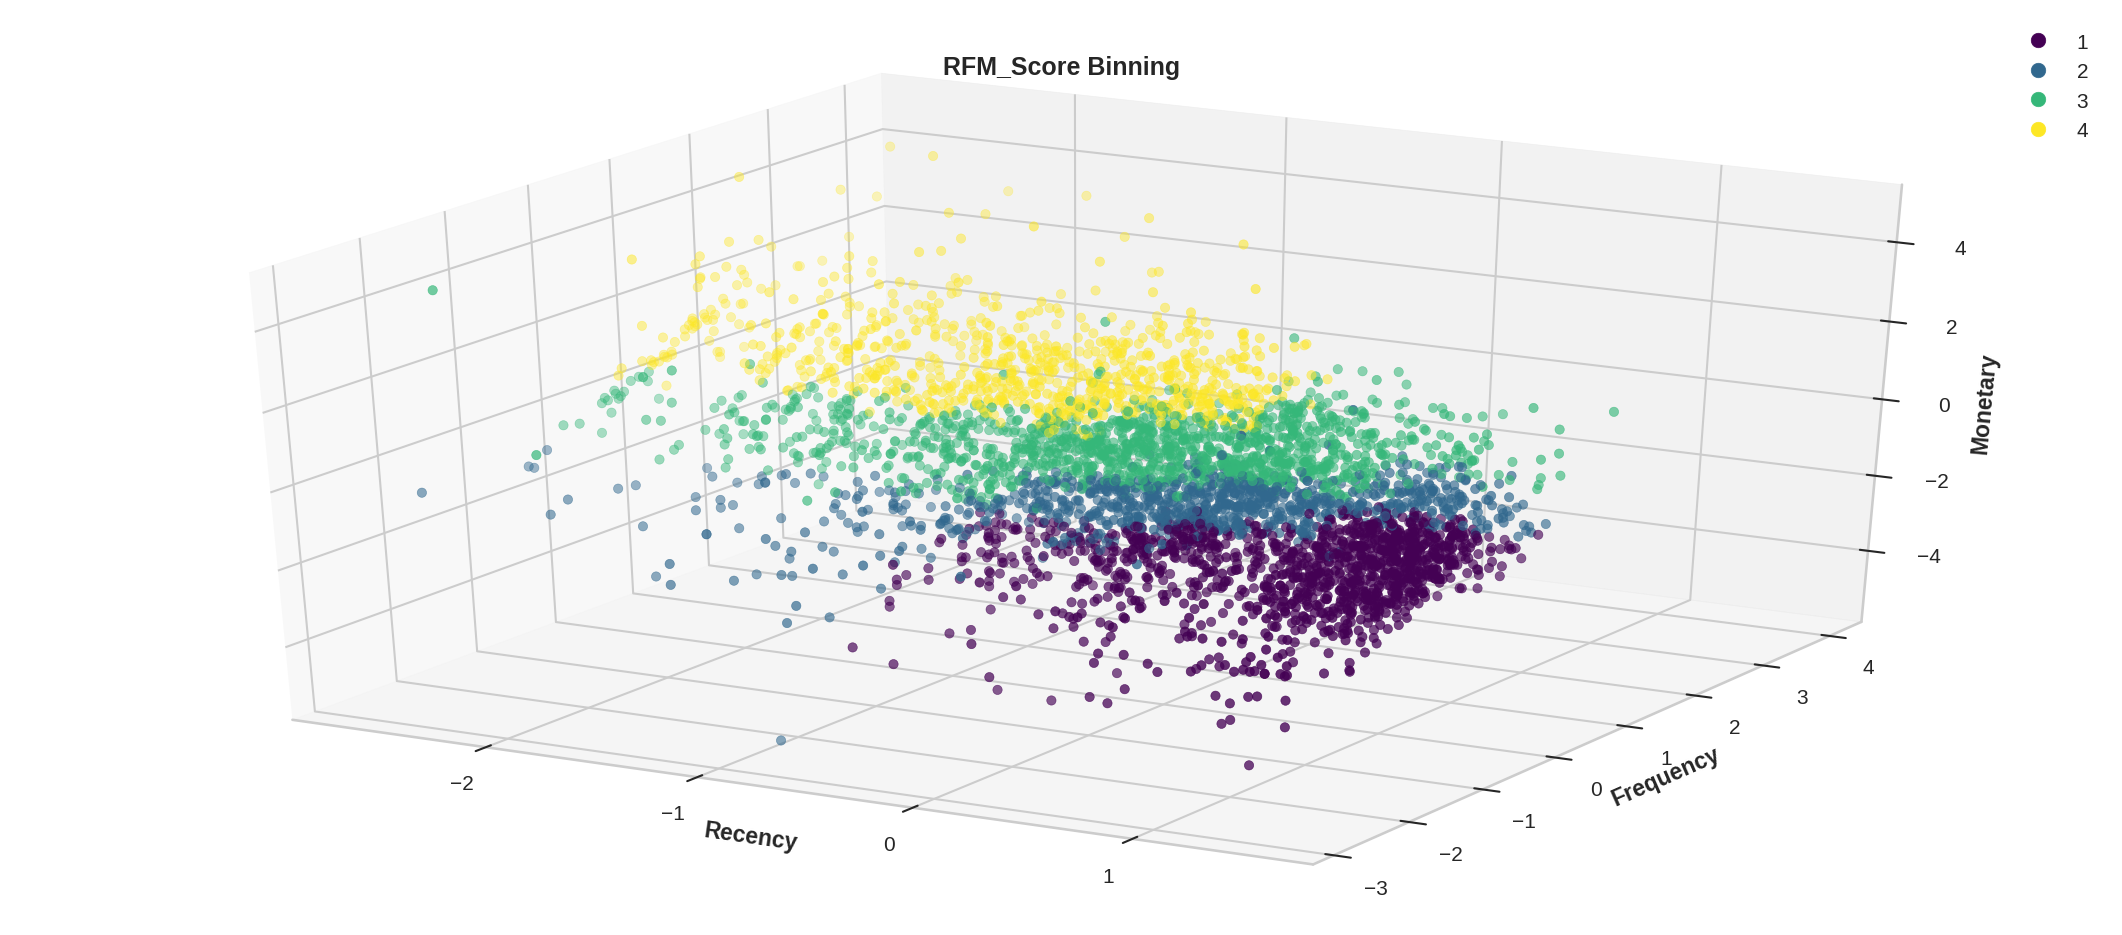

In [202]:
# Splitting RFM_Score in 4 bins based on quantiles
y_bin = pd.qcut(rfm['RFM_Score'], q=4, labels=[1,2,3,4]).astype(int)

# Plotting Segments for Visualization
title = 'RFM_Score Binning'
plotc(y_bin,title)

1. We can assign badges like (Platinum, Gold, Silver, Bronze) or simply the ordinal scores like 1, 2, 3, 4 to the customers depending upon the RFM Scores obtained.

In [203]:
# Summarizing the results bssed on the above table
summary = pd.DataFrame({"SEGMENT": [1, 2, 3, 4],
                        'RECENCY': ['POOR', 'AVERAGE', 'GOOD', 'EXCELLENT'],
                        'FREQUENCY': ['RARE', 'OCASSIONAL','OFTEN', 'FREQUENT'],
                        'MONETARY': ['LOW', 'MID-LOW', 'MID-HIGH', 'HIGH'],
                        'DESCRIPTION': ['LOST CUSTOMERS', 'CHEAP CUSTOMERS', 'GOOD CUSTOMERS', 'BEST CUSTOMERS']},
                        index=['', '', '', ''])
display(summary)

SEGMENT    RECENCY   FREQUENCY  MONETARY      DESCRIPTION
        1       POOR        RARE       LOW   LOST CUSTOMERS
        2    AVERAGE  OCASSIONAL   MID-LOW  CHEAP CUSTOMERS
        3       GOOD       OFTEN  MID-HIGH   GOOD CUSTOMERS
        4  EXCELLENT    FREQUENT      HIGH   BEST CUSTOMERS

##**Quantile Based Clustering**

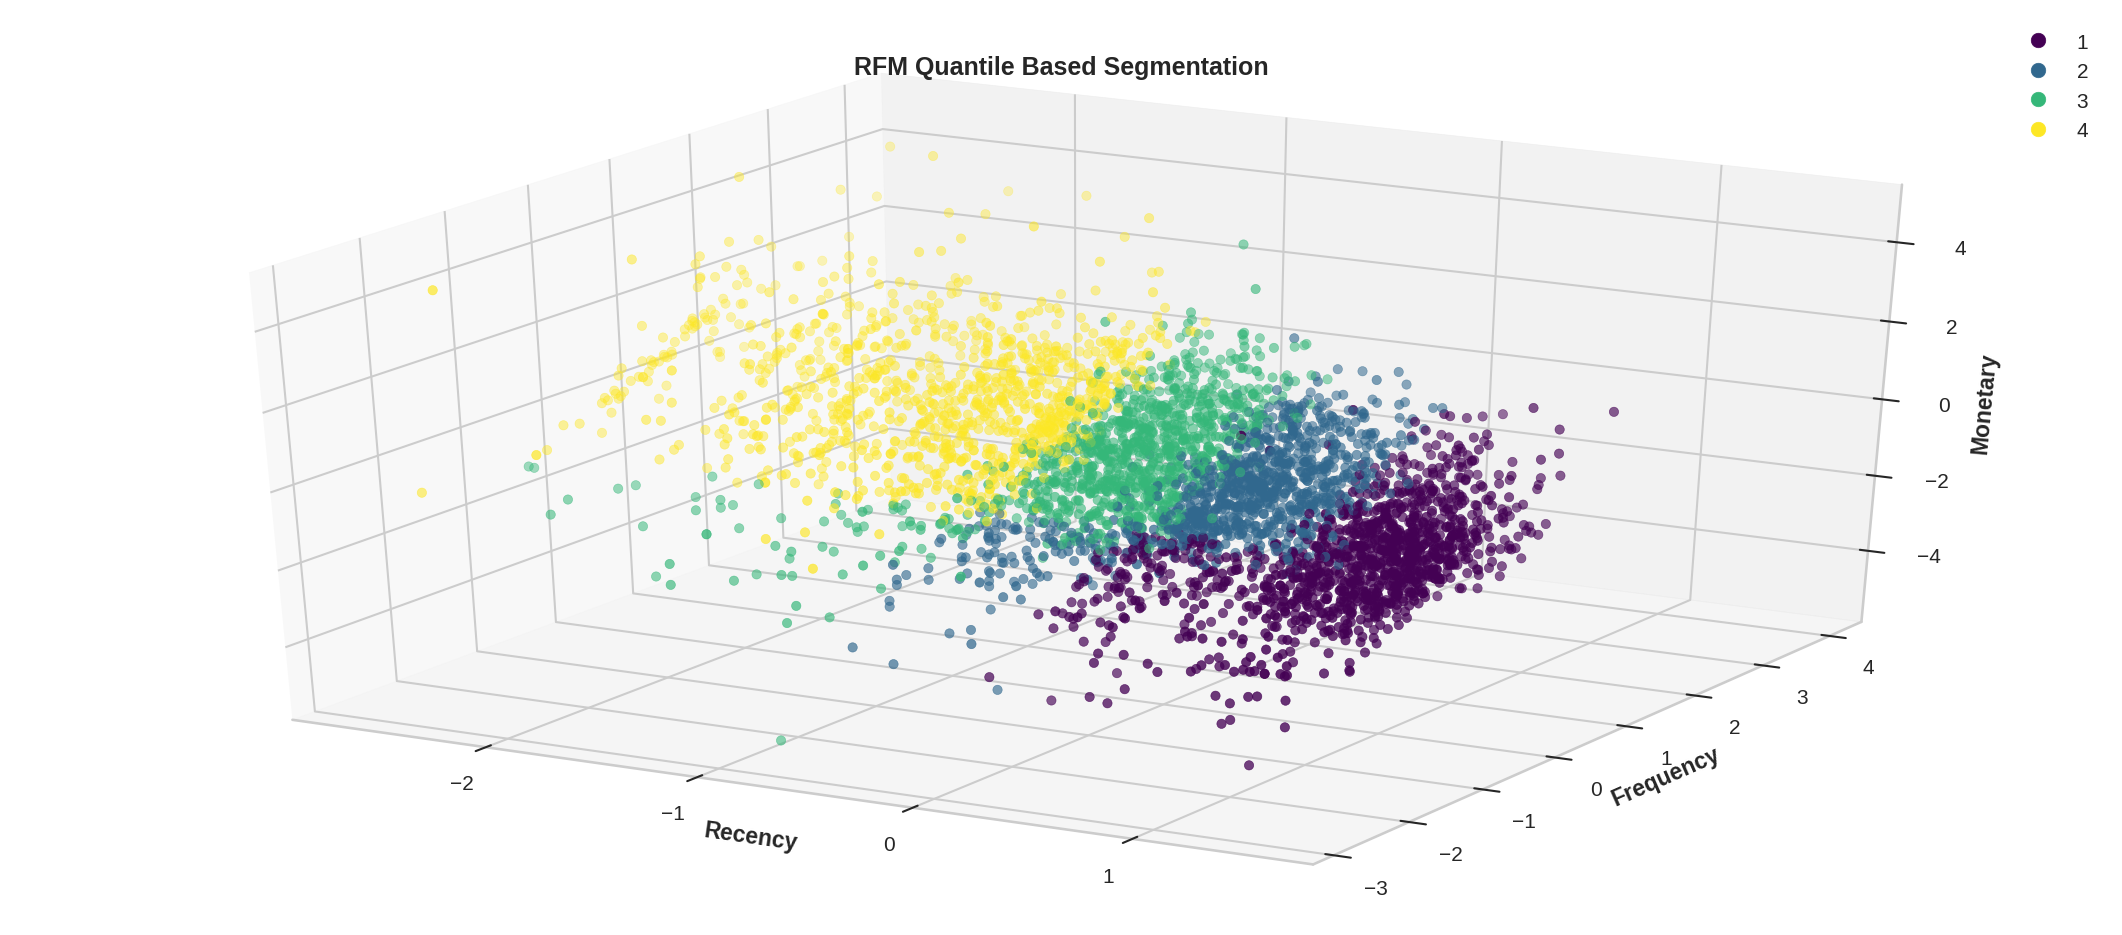

In [204]:
# Splitting RFM in 4 segments based on quantiles to obtain segments
y_qcut = pd.qcut(rfm['RFM'], q=4, labels=[1,2,3,4]).astype(int)

# Plotting Segments for Visualization
title = 'RFM Quantile Based Segmentation'
plotc(y_qcut,title)

In [205]:
# Summarizing the results bssed on the above table
summary = pd.DataFrame({"SEGMENT": [1, 2, 3, 4],
                        'RECENCY': ['POOR', 'AVERAGE', 'GOOD', 'EXCELLENT'],
                        'FREQUENCY': ['RARE', 'OCASSIONAL','OFTEN', 'FREQUENT'],
                        'MONETARY': ['LOW', 'MID-LOW', 'MID-HIGH', 'HIGH'],
                        'DESCRIPTION': ['LOST CUSTOMERS', 'CHEAP CUSTOMERS', 'GOOD CUSTOMERS', 'BEST CUSTOMERS']},
                        index=['', '', '', ''])
display(summary)

SEGMENT    RECENCY   FREQUENCY  MONETARY      DESCRIPTION
        1       POOR        RARE       LOW   LOST CUSTOMERS
        2    AVERAGE  OCASSIONAL   MID-LOW  CHEAP CUSTOMERS
        3       GOOD       OFTEN  MID-HIGH   GOOD CUSTOMERS
        4  EXCELLENT    FREQUENT      HIGH   BEST CUSTOMERS

##**K-Means Clustering**

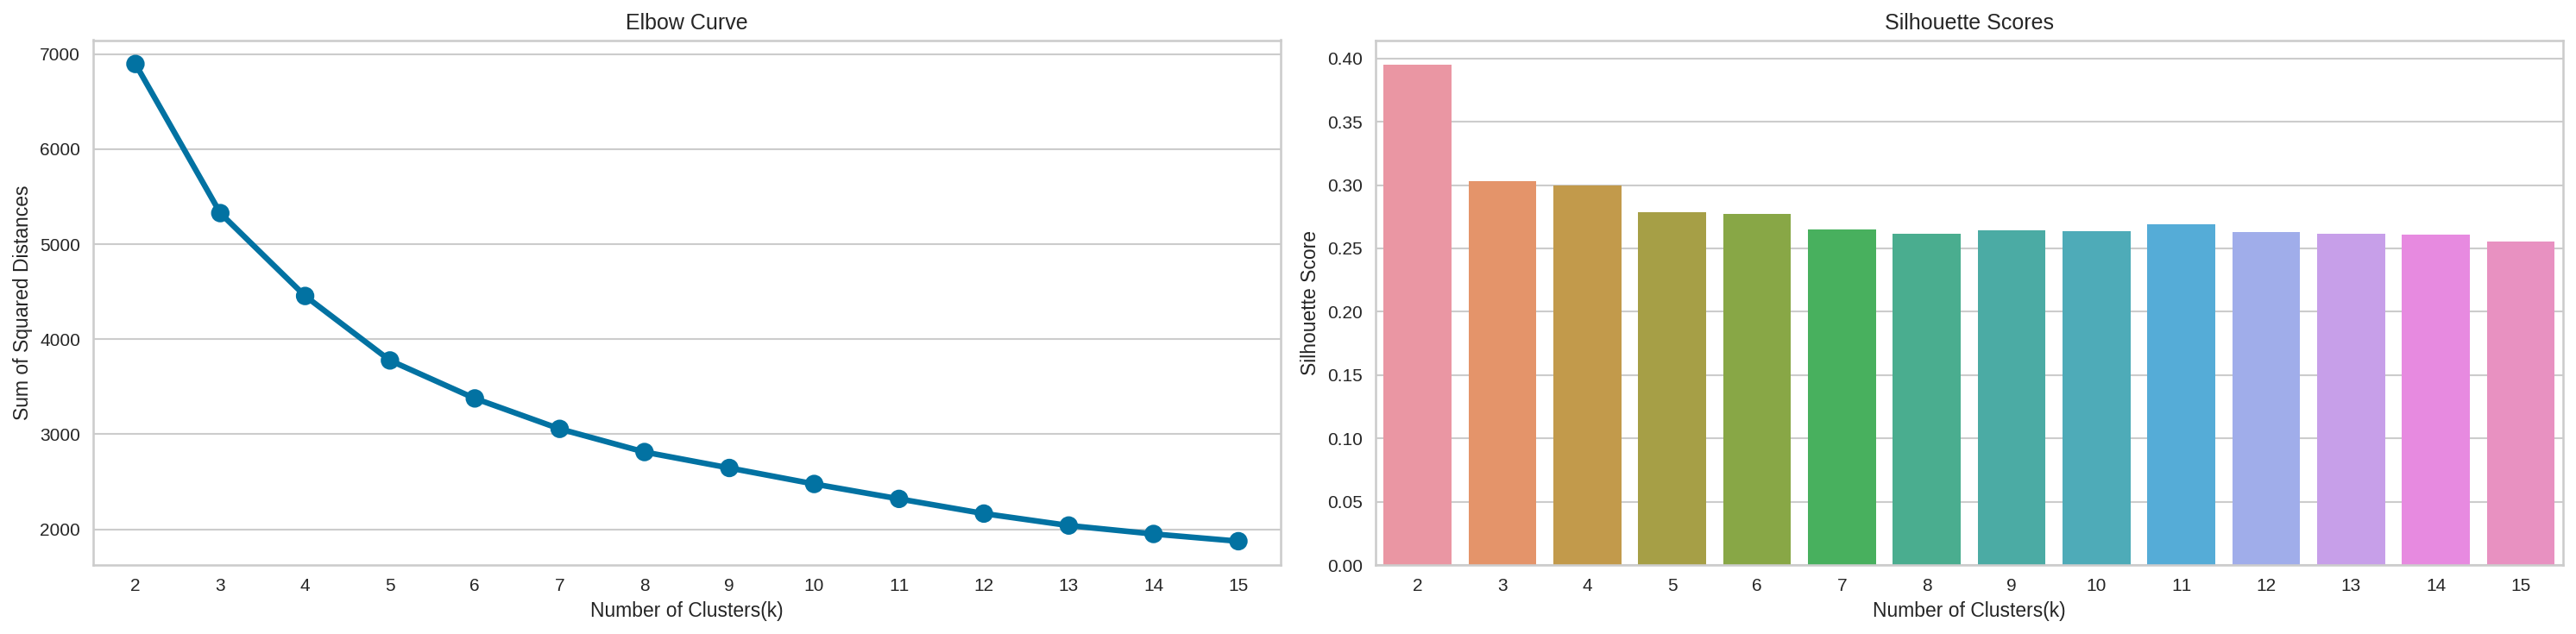

In [206]:
# Storing sum of squared distances and Silhouette Scores for each value of k in k means clusterer
ssd,score = [],[]
n_clusters = list(range(2,16))
for k in n_clusters:
    clusterer = KMeans(n_clusters = k, init= 'k-means++', max_iter= 1000)
    y_preds = clusterer.fit_predict(X)
    ssd.append(clusterer.inertia_)
    score.append(silhouette_score(X, y_preds))

# Plotting Elbow curve to find optimal K
plt.subplot(1, 2, 1)
sns.pointplot(x=n_clusters, y=ssd)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Curve')

# Silhouette Score v/s Number of Clusters
plt.subplot(1, 2, 2)
sns.barplot(x=n_clusters, y=score)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.tight_layout()

Observations:
1. From the Elbow curve 5 appears to be at the elbow and hence can be considered as the number of clusters. n_clusters=4 or 6 can also be considered based of the objective of segmentation.
2. If we go by maximum Silhouette Score as the criteria for selecting optimal number of clusters, then n_clusters=2 can be chosen. 3 and 4 is also a good choice if we want more segments.
3. If we look at both of the graphs at the same time to decide the optimal number of clusters, we can take the intersection of set of good n_clusters obtained from both the graphs. So 4 appears to be a good choice, having a decent Silhouette score as well as near the elbow of the elbow curve.

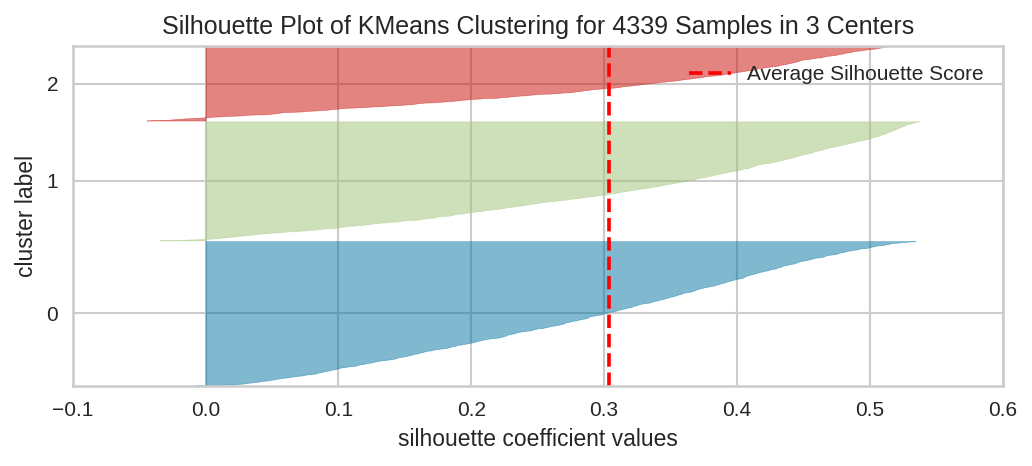

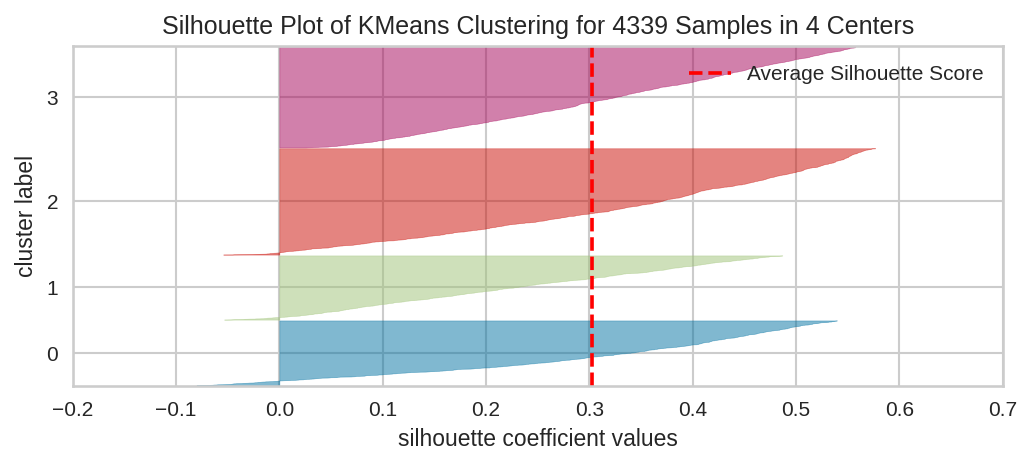

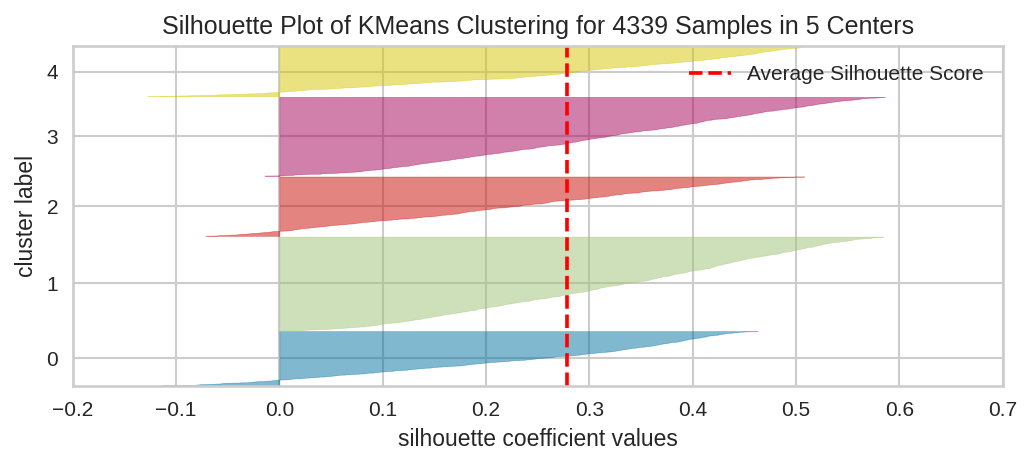

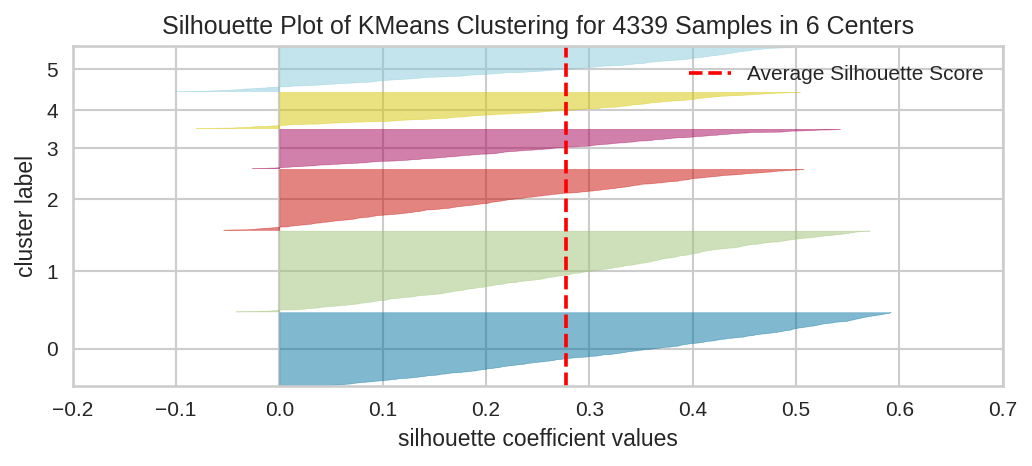

In [207]:
# Visualizing the Silouette plots for the clusters
for i in range(3,7):
    plt.figure(figsize = (8, 3))
    kmeans=KMeans(i,init="k-means++")
    visualizer=SilhouetteVisualizer(kmeans,colors='yellowbrick')
    visualizer.fit(X)
    visualizer.show()

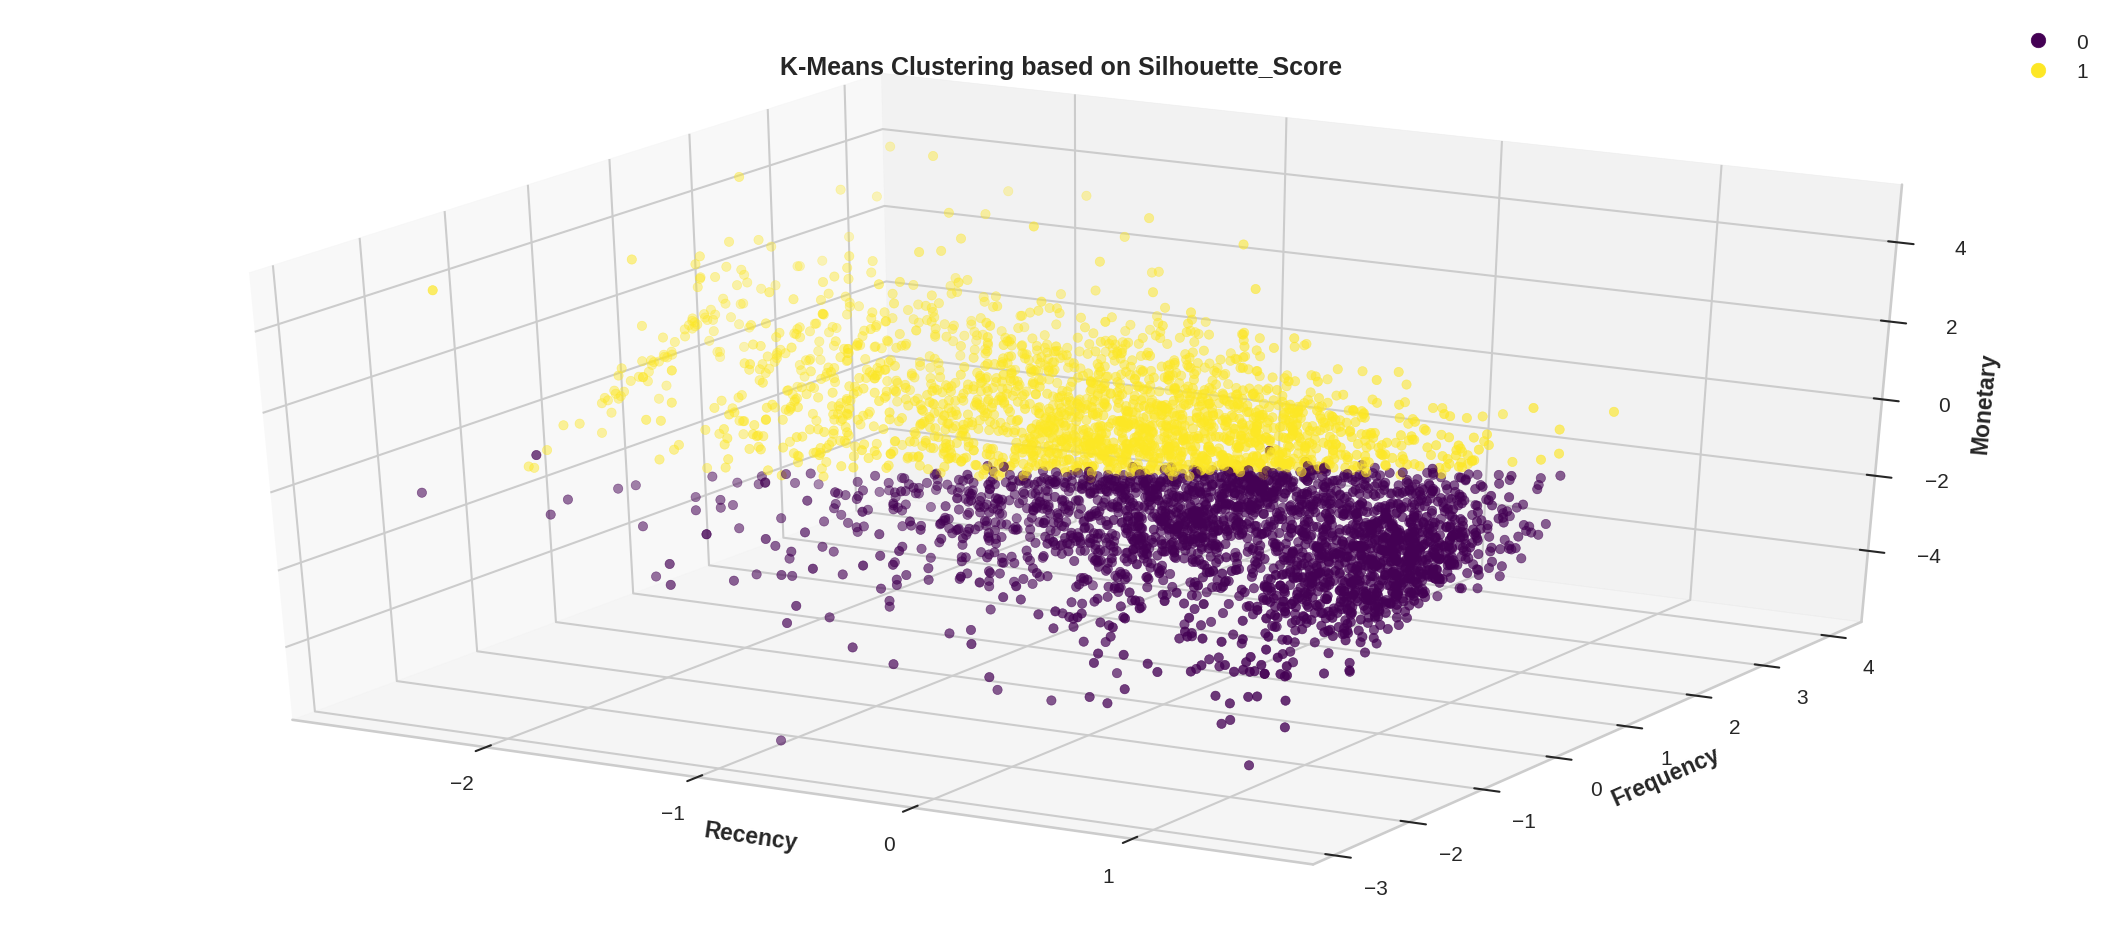

In [208]:
# Fitting the model on n_clusters = 2 based on Silhouette_Score to visualise the segments.
kmc = KMeans(n_clusters=2)
y_kmc = kmc.fit_predict(X)
centers = kmc.cluster_centers_

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Silhouette_Score'
plotc(y_kmc,title)

In [209]:
# Summarizing the results bssed on the above table
summary = pd.DataFrame({"SEGMENT": [0, 1],
                        'RECENCY': ['RECENT', 'PAST'],
                        'FREQUENCY': ['FREQUENT','RARE'],
                        'MONETARY': ['HIGH', 'LOW'],
                        'DESCRIPTION': ['GOOD CUSTOMERS', 'LOST CHEAP CUSTOMERS']},
                        index=['', ''])
display(summary)

SEGMENT RECENCY FREQUENCY MONETARY           DESCRIPTION
        0  RECENT  FREQUENT     HIGH        GOOD CUSTOMERS
        1    PAST      RARE      LOW  LOST CHEAP CUSTOMERS

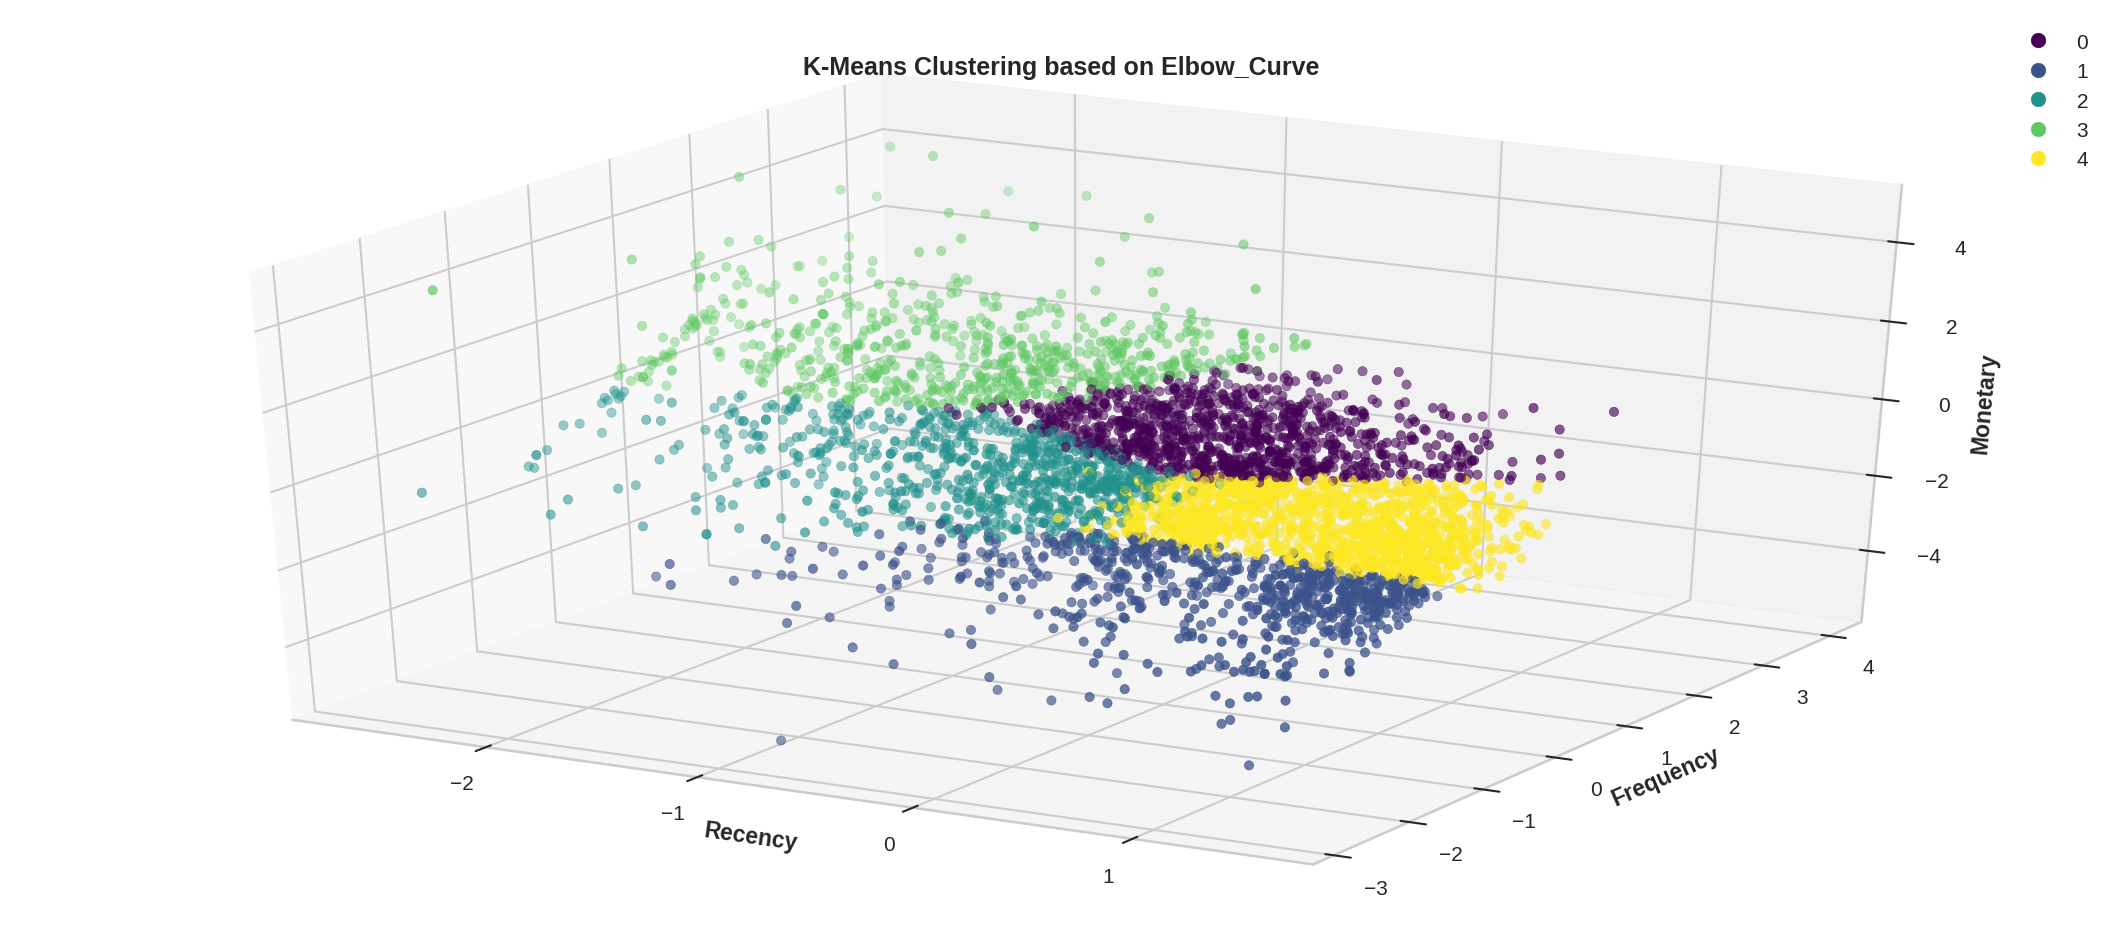

In [210]:
# Fitting the model on n_clusters = 2 based on Elbow_Curve to visualise the segments.
kmc = KMeans(n_clusters=5)
y_kmc = kmc.fit_predict(X)
centers = kmc.cluster_centers_

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Elbow_Curve'
plotc(y_kmc,title)

In [211]:
# Summarizing the results bssed on the above table
summary = pd.DataFrame({"SEGMENT": [0, 1, 2, 3, 4],
                        'RECENCY': ['POOR', 'GOOD', 'POOR', 'AVERAGE', 'EXCELLENT'],
                        'FREQUENCY': ['OCASSIONAL', 'OCASSIONAL', 'RARE', 'OFTEN', 'FREQUENT'],
                        'MONETARY': ['MID-LOW', 'MID-LOW', 'LOW', 'MID-HIGH', 'HIGH'],
                        'DESCRIPTION': ['ALMOST LOST CUSTOMERS', 'CHEAP CUSTOMERS',  'LOST CHEAP CUSTOMERS', 'GOOD CUSTOMERS', 'BEST CUSTOMERS']},
                        index=['', '', '', '', ''])
display(summary)

SEGMENT    RECENCY   FREQUENCY  MONETARY            DESCRIPTION
        0       POOR  OCASSIONAL   MID-LOW  ALMOST LOST CUSTOMERS
        1       GOOD  OCASSIONAL   MID-LOW        CHEAP CUSTOMERS
        2       POOR        RARE       LOW   LOST CHEAP CUSTOMERS
        3    AVERAGE       OFTEN  MID-HIGH         GOOD CUSTOMERS
        4  EXCELLENT    FREQUENT      HIGH         BEST CUSTOMERS

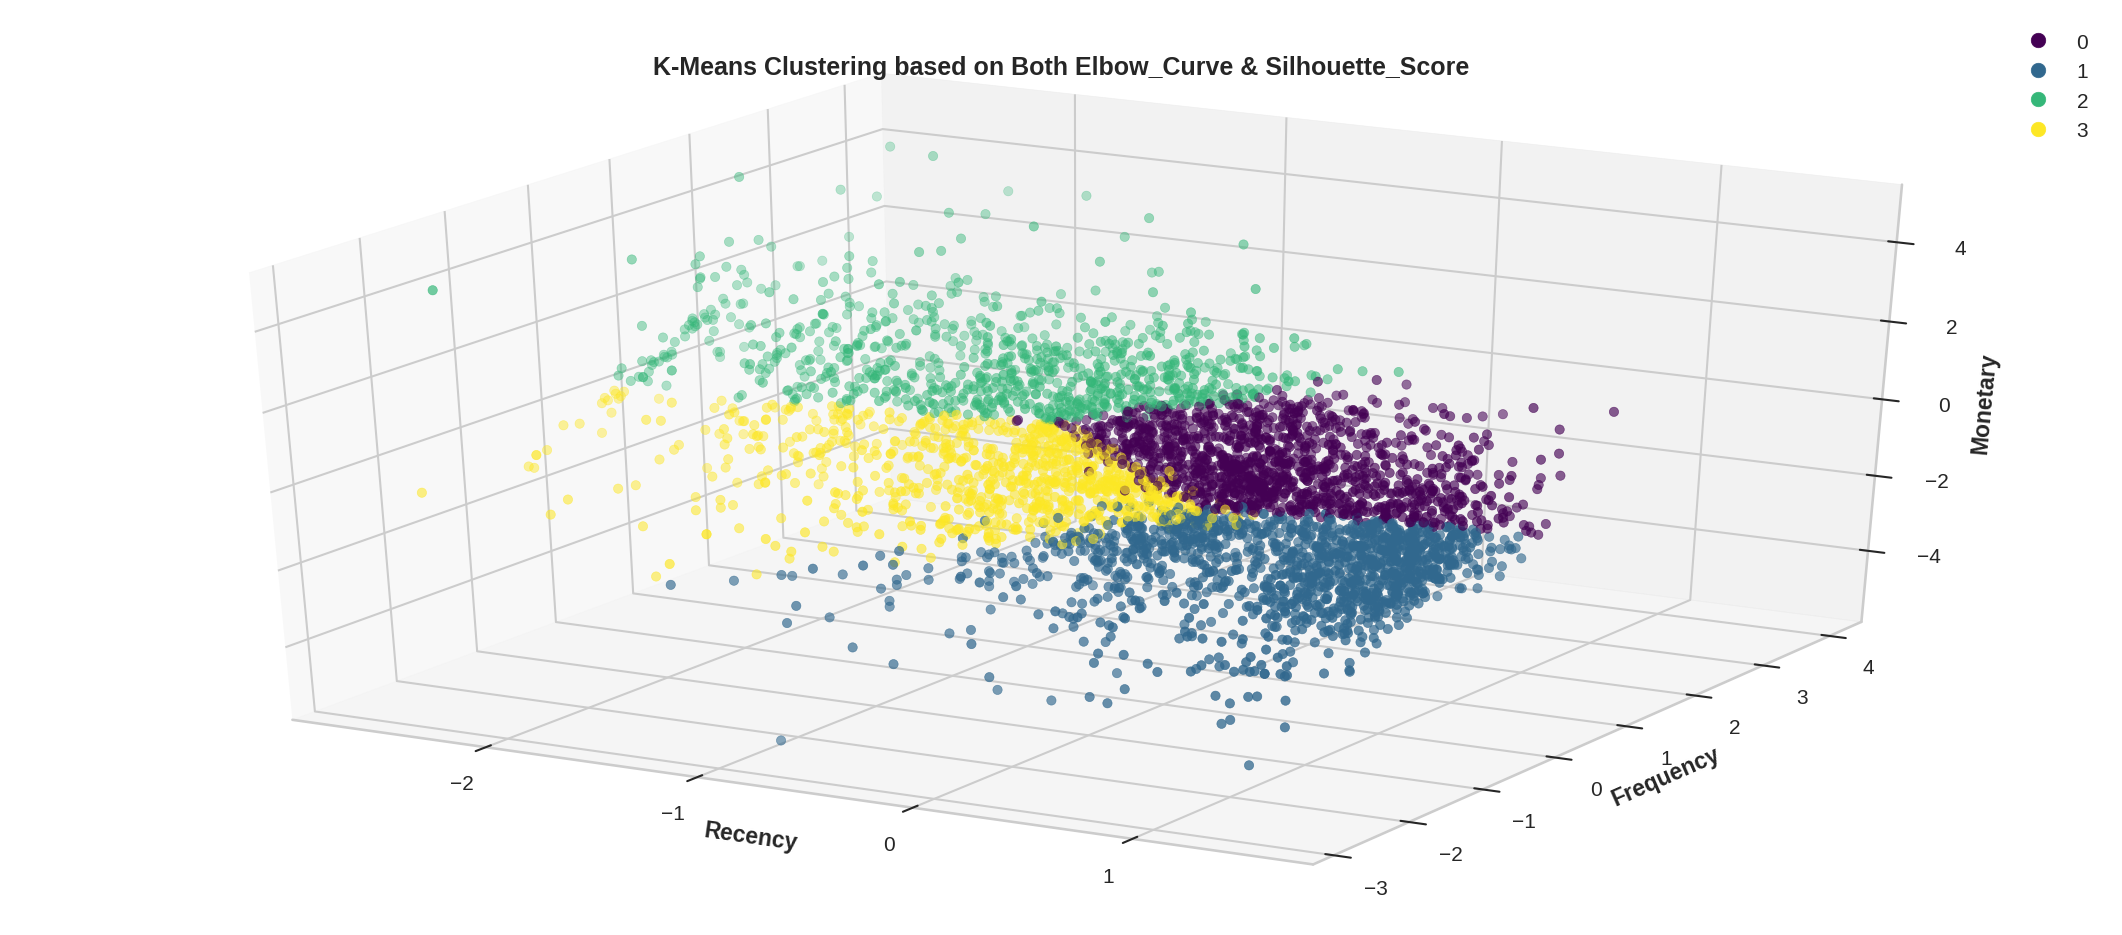

In [212]:
# Fitting the model on n_clusters = 2 based on Both Elbow_Curve & Silhouette_Score to visualise the segments.
kmc = KMeans(n_clusters=4)
y_kmc = kmc.fit_predict(X)
centers = kmc.cluster_centers_

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Both Elbow_Curve & Silhouette_Score'
plotc(y_kmc,title)

In [213]:
# Summarizing the results bssed on the above table
summary = pd.DataFrame({"SEGMENT": [0, 1, 2, 3],
                        'RECENCY': ['POOR', 'GOOD', 'EXCELLENT', 'AVERAGE'],
                        'FREQUENCY': ['RARE', 'OCASSIONAL', 'FREQUENT', 'OFTEN'],
                        'MONETARY': ['LOW', 'MID-LOW', 'HIGH', 'MID-HIGH'],
                        'DESCRIPTION': ['LOST CHEAP CUSTOMERS', 'CHEAP CUSTOMERS',  'BEST CUSTOMERS', 'GOOD CUSTOMERS']},
                        index=['', '', '', '']) 
display(summary)

SEGMENT    RECENCY   FREQUENCY  MONETARY           DESCRIPTION
        0       POOR        RARE       LOW  LOST CHEAP CUSTOMERS
        1       GOOD  OCASSIONAL   MID-LOW       CHEAP CUSTOMERS
        2  EXCELLENT    FREQUENT      HIGH        BEST CUSTOMERS
        3    AVERAGE       OFTEN  MID-HIGH        GOOD CUSTOMERS

##**Hierarchical Clustering**

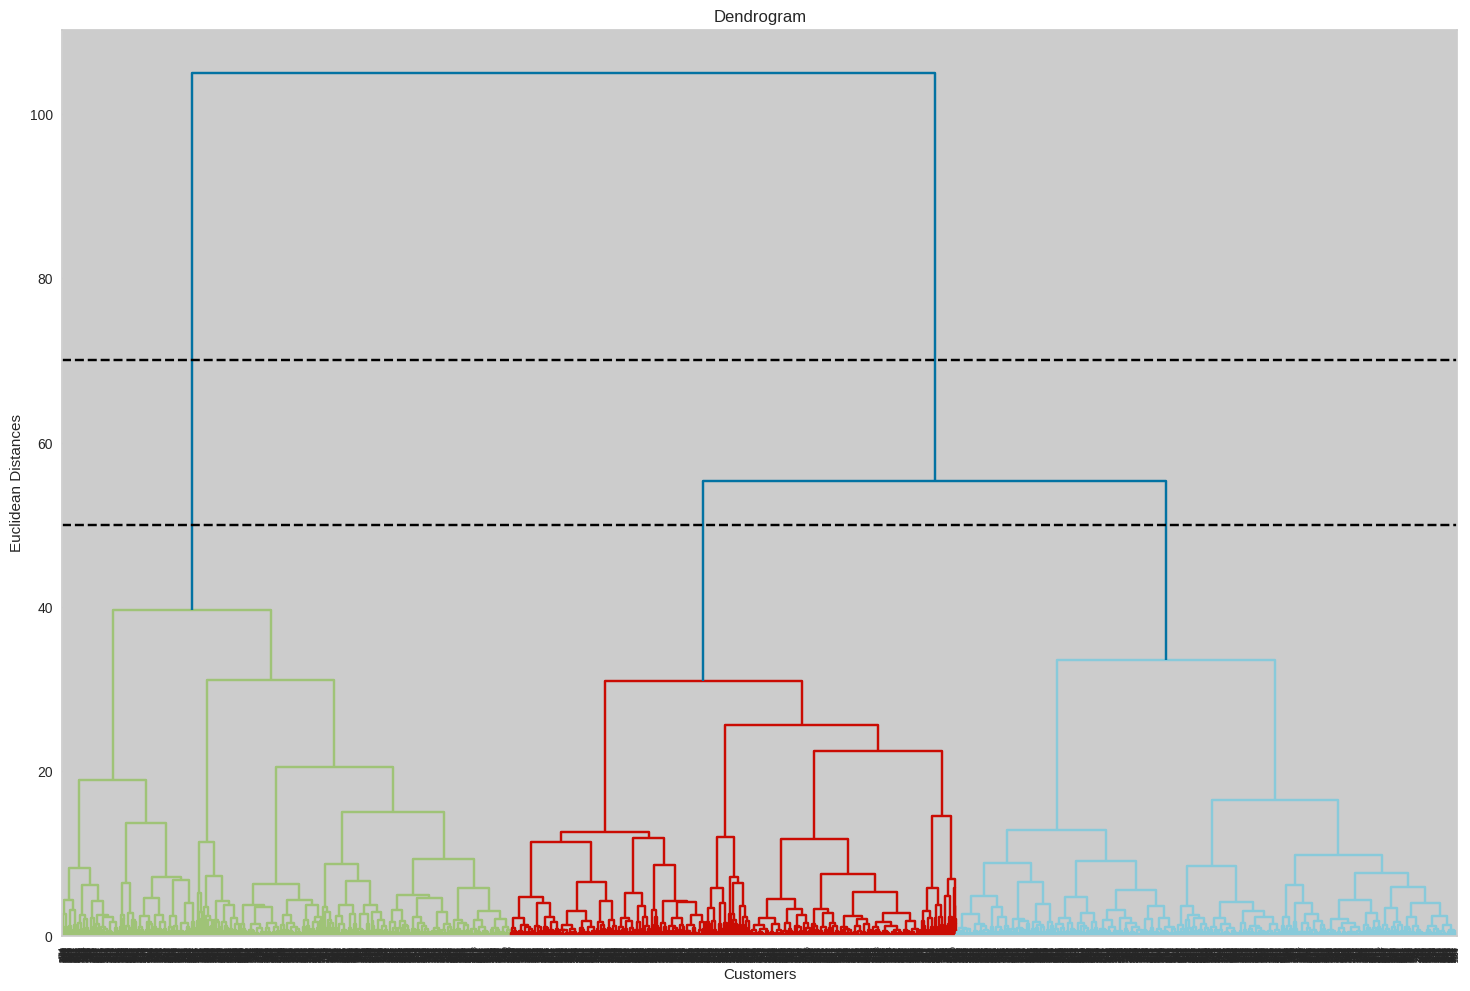

In [214]:
# Using the Dendogram to Decide the number of clusters
plt.figure(figsize=(18,12), dpi=100)
dendrogram(linkage(X, method='ward'), color_threshold=50)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=70, color='black', linestyle='--')
plt.axhline(y=50, color='black', linestyle='--')
plt.show()

Interpretation:
1. We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line). We can set this threshold as 50 or 70 and draw a horizontal line as shown in dendogram above.
2. The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold. The larger threshold (y=70) results in 2 clusters while the smaller (y=50) results in 3 clusters.

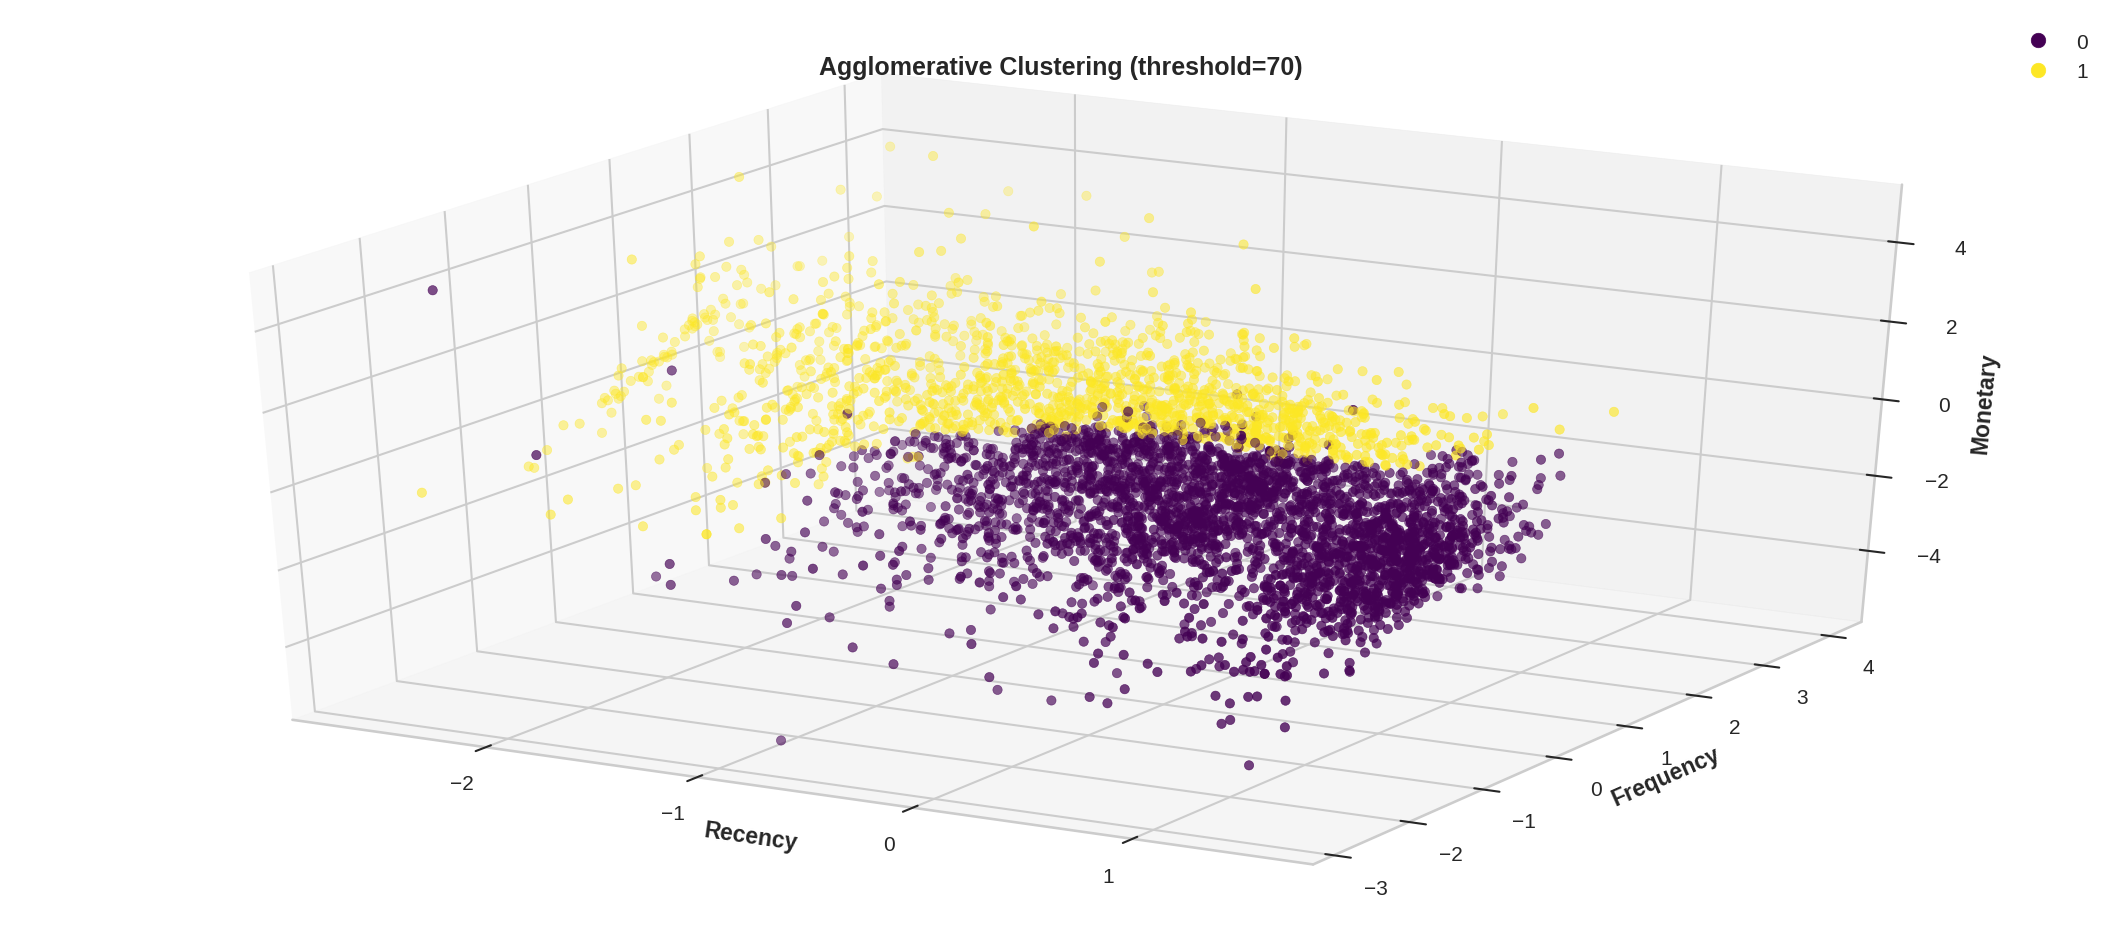

In [215]:
# Fitting hierarchical clustering with number of clusters based on dendogram distance threshold = 70
ahc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_ahc = ahc.fit_predict(X)

# Lets visualize the clusters with n_clusters = 2
title = 'Agglomerative Clustering (threshold=70)'
plotc(y_ahc,title)

In [216]:
# Summarizing the results bssed on the above table
summary = pd.DataFrame({"SEGMENT": [0, 1],
                        'RECENCY': ['PAST', 'RECENT'],
                        'FREQUENCY': ['RARE', 'FREQUENT'],
                        'MONETARY': ['LOW', 'HIGH'],
                        'DESCRIPTION': ['LOST CHEAP CUSTOMERS', 'GOOD CUSTOMERS']},
                        index=['', ''])
display(summary)

SEGMENT RECENCY FREQUENCY MONETARY           DESCRIPTION
        0    PAST      RARE      LOW  LOST CHEAP CUSTOMERS
        1  RECENT  FREQUENT     HIGH        GOOD CUSTOMERS

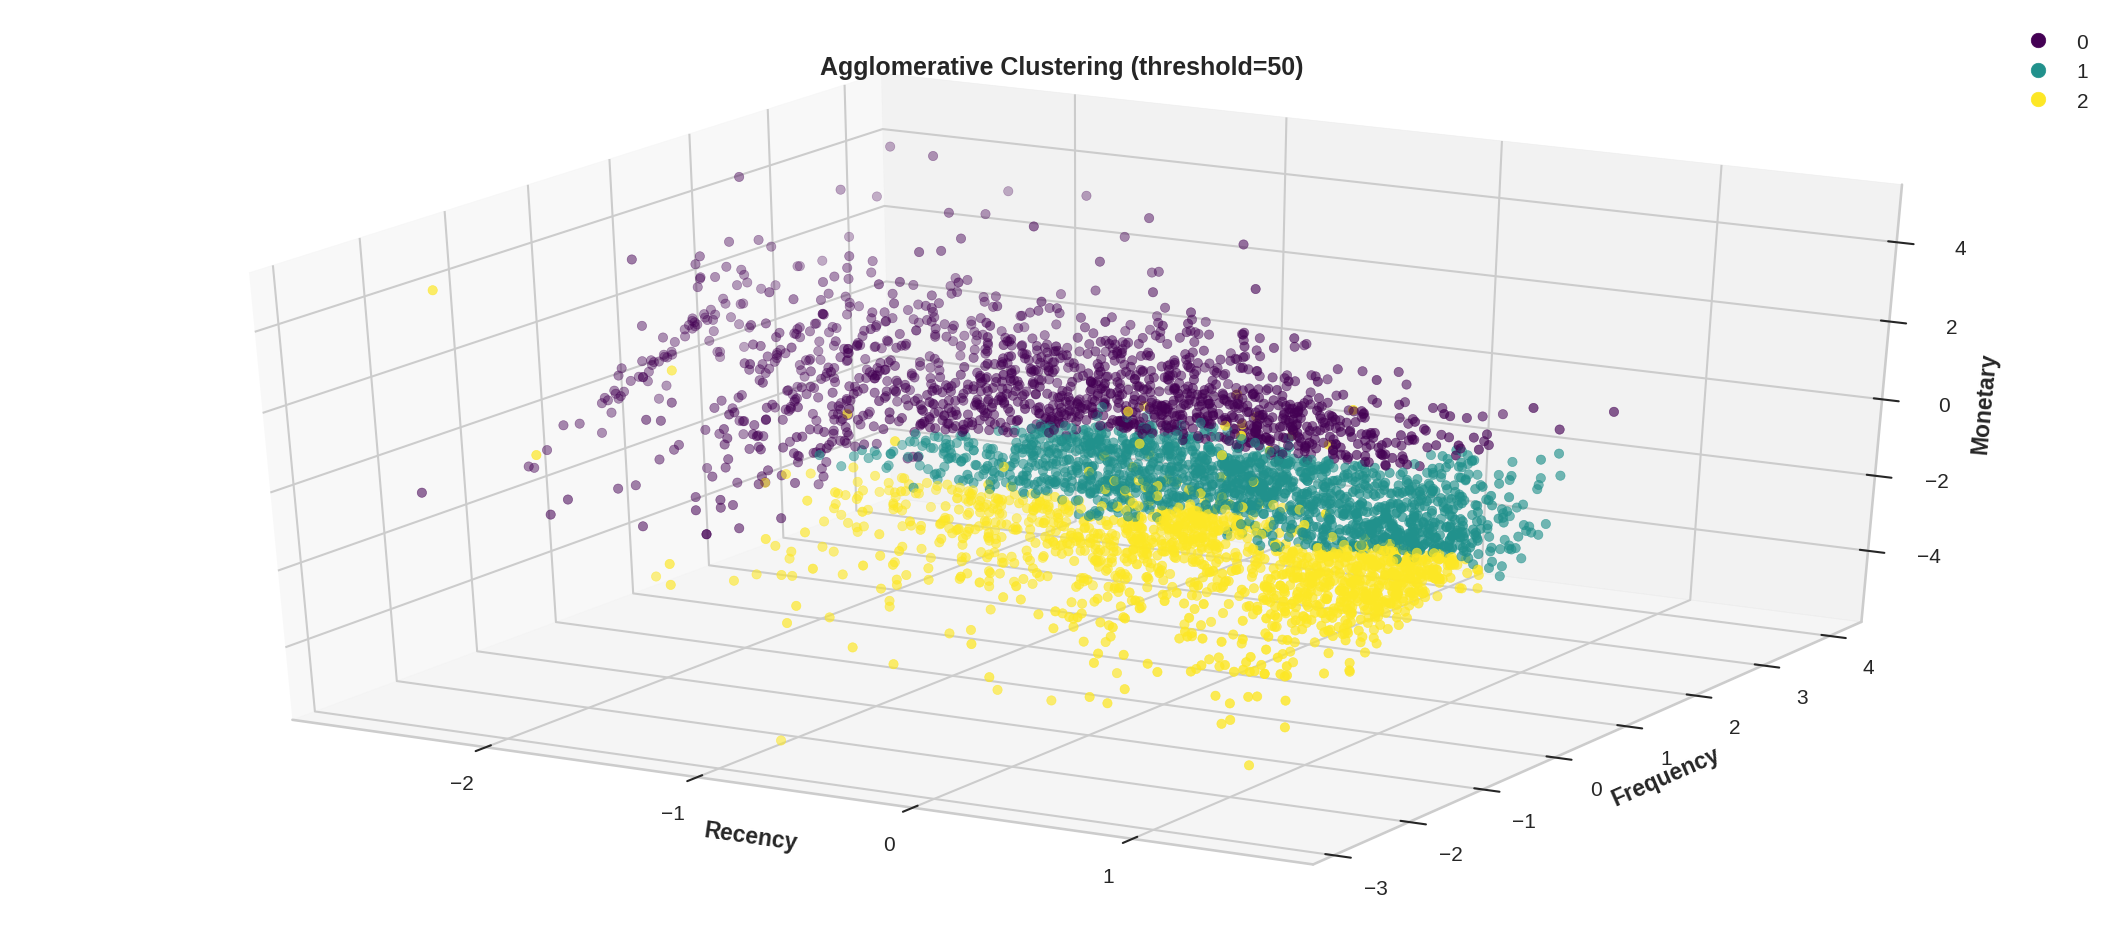

In [217]:
# Fitting hierarchical clustering with number of clusters based on dendogram distance threshold = 50
ahc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_ahc = ahc.fit_predict(X)

# Lets visualize the clusters with n_clusters = 3
title = 'Agglomerative Clustering (threshold=50)'
plotc(y_ahc,title)

In [218]:
# Summarizing the results bssed on the above table
summary = pd.DataFrame({"SEGMENT": [0, 1, 2],
                        'RECENCY': ['GOOD', 'AVERAGE', 'POOR'],
                        'FREQUENCY': ['FREQUENT', 'OCASSIONAL', 'RARE'],
                        'MONETARY': ['HIGH', 'MEDIUM', 'LOW'],
                        'DESCRIPTION': ['BEST CUSTOMERS', 'GOOD CUSTOMERS', 'LOST CHEAP CUSTOMERS']},
                        index=['', '', ''])
display(summary)

SEGMENT  RECENCY   FREQUENCY MONETARY           DESCRIPTION
        0     GOOD    FREQUENT     HIGH        BEST CUSTOMERS
        1  AVERAGE  OCASSIONAL   MEDIUM        GOOD CUSTOMERS
        2     POOR        RARE      LOW  LOST CHEAP CUSTOMERS

##**DBScan Clusterer**

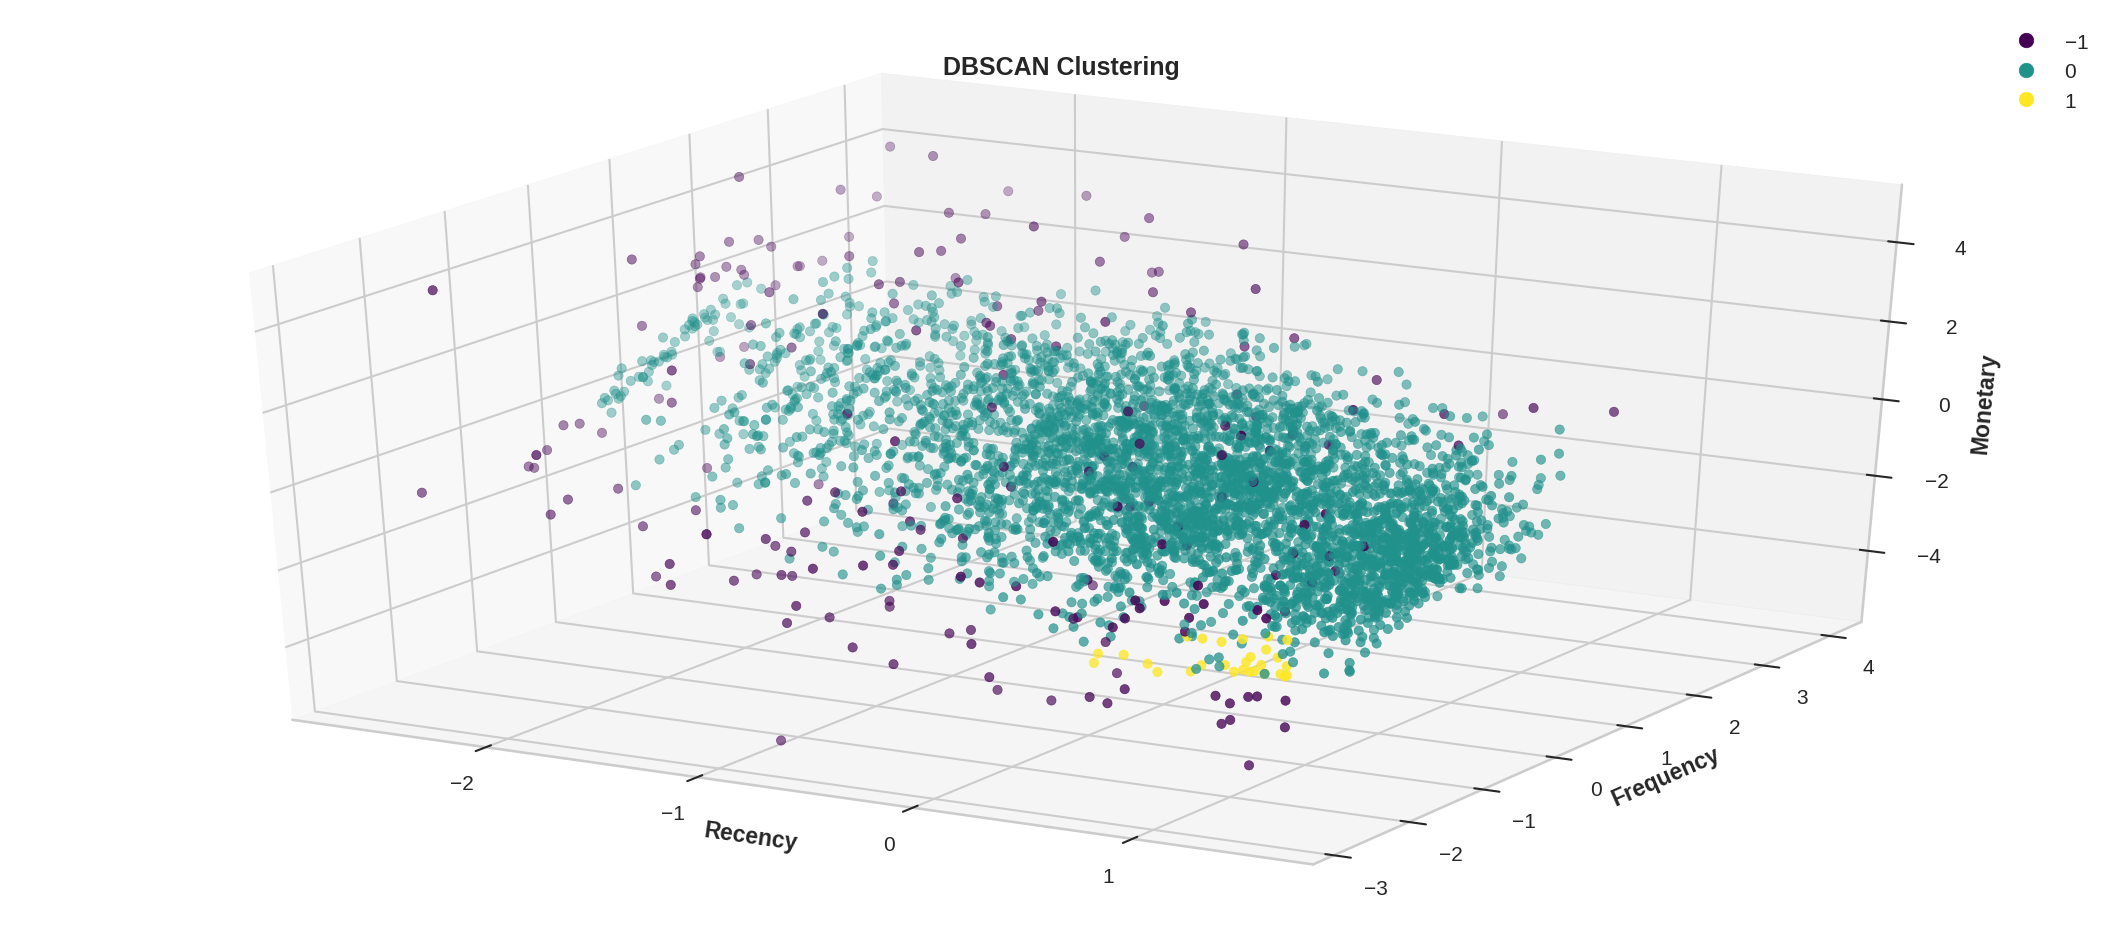

In [219]:
# Fitting DBSCAN clusterer
dbsc = DBSCAN(eps=0.5, min_samples=15)
y_dbsc = dbsc.fit_predict(X)

# Plotting Clusters for Visualization
title = 'DBSCAN Clustering'
plotc(y_dbsc,title)

In [220]:
# Summarizing the results bssed on the above table
summary = pd.DataFrame({"SEGMENT": [-1, 0, 1],
                        'RECENCY': ['GOOD', 'AVERAGE', 'POOR'],
                        'FREQUENCY': ['OCASSIONAL', 'FREQUENT', 'RARE'],
                        'MONETARY': ['HIGH', 'MEDIUM', 'LOW'],
                        'DESCRIPTION': ['BEST CUSTOMERS', 'GOOD CUSTOMERS', 'LOST CHEAP CUSTOMERS']},
                        index=['', '', ''])
display(summary)

SEGMENT  RECENCY   FREQUENCY MONETARY           DESCRIPTION
       -1     GOOD  OCASSIONAL     HIGH        BEST CUSTOMERS
        0  AVERAGE    FREQUENT   MEDIUM        GOOD CUSTOMERS
        1     POOR        RARE      LOW  LOST CHEAP CUSTOMERS

1. Density-based spatial clustering of applications with noise (DBSCAN) is an alternative to KMeans and hierarchical clustering. It does not require us to specify the number of clusters, as the clusters are formed by a process of linking neighbor points together.
2. It avoids outliers and identifies nested clusters within the data. The data is muddled and does not have major visible nested cluster, yet it has identified 3 clusters as shown above based on the hyperparameters defined.

##**Conclusion**

1. We started with a simple binning and quantile based simple segmentation model first then moved to more complex models because simple implementation helps having a first glance at the data and know where/how to exploit it better.
2. Then we moved to k-means clustering and visualized the results with different number of clusters. As we know there is no assurance that k-means will lead to the global best solution. We moved forward and tried Hierarchical Clustering and DBSCAN clusterer as well.
3. We created several useful clusters of customers on the basis of different metrics and methods to cateorize the customers on the basis of their beavioural attributes to define their valuability, loyality, profitability etc for the business. Though significantly separated clusters are not visible in the plots, but the clusters obtained is fairly valid and useful as per the  algorithms and the statistics extracted from the data.
4. Segments depends on how the business plans to use the results, and the level of granularity they want to see in the clusters. Keeping these points in view we clustered the major segments based on our understanding as per diffrent criteria as shown in the summary dataframe.


In [221]:
# Summarizing the results obtained by clustering using various methods
summary = pd.DataFrame({"Clusterer": ['Binning','Quantile Cut', "K-Means", "K-Means", "K-Means", "Agglomerative","Agglomerative", "DBSCAN"],
                        'Criterion': ['RFM Score Binning', 'RFM Quantile Cut', 'Elbow Curve', 'Silhouette Score','Elbow Curve & Silhouette Score',
                                      'Dendogram (y=70)', 'Dendogram (y=50)', np.nan],
                        "Segments" : [4,4,5,2,4,2,3,3]},
                        index=['', '', '', '', '', '', '', ''])
summary

Clusterer                       Criterion  Segments
        Binning               RFM Score Binning         4
   Quantile Cut                RFM Quantile Cut         4
        K-Means                     Elbow Curve         5
        K-Means                Silhouette Score         2
        K-Means  Elbow Curve & Silhouette Score         4
  Agglomerative                Dendogram (y=70)         2
  Agglomerative                Dendogram (y=50)         3
         DBSCAN                             NaN         3

#**Thankyou**